In [111]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname='/System/Library/Fonts/PingFang.ttc')
sns.set(font = myfont.get_name())

In [2]:
stu_adm = pd.read_csv('student_admission106.csv', encoding="utf-8", dtype=str)
uname = pd.read_csv('univ_name106short1.csv', encoding="utf-8", dtype=str)

all_depid = stu_adm['department_id'].unique()
all_stuid = stu_adm['student_id'].unique()

ndepid = all_depid.shape[0]
nstuid = all_stuid.shape[0]
print("There are %d students and %d departments in total." % (nstuid, ndepid))

print("offers received by students:")
stu_adm.head()

There are 60461 students and 1976 departments in total.
offers received by students:


school_id department_id student_id student_name state location1 location2
0       001        001012   10246842          黃士玹    正1        南部      台南考區
1       001        001012   10042237          黃冠婷    正2        北部      台北考區
2       001        001012   10008031          鍾大方    正3        北部      台北考區
3       001        001012   10201525          曾信豪    正4        中部      彰化考區
4       001        001012   10014615          陳品儒    正5        北部      台北考區

In [3]:
print("academic department basic information:")
uname.head()

academic department basic information:


year school_id department_id school_name department_name category_id  \
0  106       006        006042      國立政治大學            教育學系           1   
1  106       006        006052      國立政治大學       教育學系(公費生)           1   
2  106       006        006062      國立政治大學    教育學系(原住民公費生)           1   
3  106       006        006022      國立政治大學            歷史學系           2   
4  106       006        006152      國立政治大學            民族學系           2   

  category_name school_name_abbr department_name_abbr  
0            教育               政大                   教育  
1            教育               政大                教育(公)  
2            教育               政大              教育(原住民)  
3         藝術及人文               政大                   歷史  
4         藝術及人文               政大                  民族學

# Question 1 [Data Preparation]

<b>(20%) Our focus is on the relationships between departments. To do this, we need to convert the raw data into a "matrix" representation. <u>Each row represents an academic department, and each column represents a student applicant.</u> The value of the cell is one if a student applied for admission to the corresponding academic department, and 0 otherwise.
    
To avoid potential numerical problems, <u>we only include an academic department if it received ten or more applications.</u> Moreover, <u>we only include a student applicant if he or she applied for more than one academic department.</u> You need to make sure that both conditions are satisfied in your processed dataset.

Note that the two conditions should be satisfied "as is" in your final dataset. For example, if a student applied for two departments in the original dataset, and one of the departments was removed, then this student should be removed as well because the student only applied for one department in the processed dataset.</b>

* Q1.1: Report the number of academic departments and student applicants in your dataset.

In [4]:
# Remove Dept < 10 and Student <=1
department_id_index = (stu_adm["department_id"].value_counts() >= 10)[0:1931].index
stu_adm = stu_adm[stu_adm["department_id"].isin(department_id_index)]
student_id_index = (stu_adm["student_id"].value_counts() > 1)[0:47420].index
stu_adm = stu_adm[stu_adm["student_id"].isin(student_id_index)]

department_id_index = (stu_adm["department_id"].value_counts() >= 10)[0:1918].index
stu_adm = stu_adm[stu_adm["department_id"].isin(department_id_index)]
student_id_index = (stu_adm["student_id"].value_counts() > 1)[0:47386].index
stu_adm = stu_adm[stu_adm["student_id"].isin(student_id_index)]

department_id_index = (stu_adm["department_id"].value_counts() >= 10)[0:1917].index
stu_adm = stu_adm[stu_adm["department_id"].isin(department_id_index)]

In [5]:
# Convert to matrix(Index = Dept Id, Columns = Student Id)
matrix = stu_adm.pivot_table(index = "department_id", columns = "student_id", aggfunc = "count", fill_value = 0)["location1"]

In [6]:
matrix.shape

(1917, 47386)

▹ <b>Number of Academic Department = 1917 </b>\
▹ <b>Number of Student Applicants = 47386</b>

* Q1.2: Report the top ten departments that received the most applications and the number of applications they received. Identify the department by its department_id and names.

In [7]:
TopTen = pd.DataFrame(columns = uname.columns)
for i in matrix.sum(axis = 1).sort_values(ascending = False).head(11).index:
    for j in range(len(uname)):
        if uname["department_id"][j] == i:
            department = uname[uname["department_id"] == i]
            TopTen = pd.concat([TopTen, department])
TopTen["number of applications"] = stu_adm["department_id"].value_counts().head(11).tolist()
TopTen.drop(TopTen.iloc[:, [0, 5,6,7,8]], axis = 1)

school_id department_id school_name department_name  \
976        008        008122        中原大學          機械工程學系   
1764       012        012052      中國醫藥大學             藥學系   
1444       046        046032        銘傳大學      會計學系（臺北校區）   
210        004        004382      國立成功大學          電機工程學系   
982        008        008112        中原大學          土木工程學系   
937        005        005192        東吳大學          企業管理學系   
935        005        005182        東吳大學            會計學系   
1101       015        015342        逢甲大學          財務金融學系   
1384       045        045012        義守大學          電機工程學系   
1114       015        015222        逢甲大學          資訊工程學系   
1438       046        046162        銘傳大學    應用英語學系（桃園校區）   

      number of applications  
976                      386  
1764                     376  
1444                     367  
210                      357  
982                      353  
937                      353  
935                      351  
1101                     340  
1384                     339  
1114                     329  
1438                     329

♕ <b>1st: 中原大學	 機械工程學系 (008122) : 386人</b>\
♕ <b>2nd: 中國醫藥大學  藥學系（012052）：376人</b>\
♕ <b>3rd: 銘傳大學	 會計學系（臺北校區）（046032）：367人</b>\
▹ 4th: 國立成功大學  電機工程學系（004382）：357人\
▹ 5th: 東吳大學  企業管理學系（005192）：353人\
▹ 5th: 中原大學  土木工程學系（008112）	：353人\
▹ 7th: 東吳大學	 會計學系（005182）：351人\
▹ 8th: 逢甲大學	 財務金融學系（015342）：340人\
▹ 9th: 義守大學	 電機工程學系（045012）：339人\
▹ 10th: 逢甲大學  資訊工程學系（015222）	：329人\
▹ 10th: 銘傳大學  應用英語學系（桃園校區）（046162）	：329人

# Question 2 [Explore]

<b>(50%) Visualize academic departments in the following questions. In all plots, <u>you should color data points according to the academic department's category</u>. Moreover, you should provide a legend or a picture that illustrates the mapping between colors and category names. <u>Visualize the data using two-dimensional plots.</u> Note that it is your responsibility to study the documentation of libraries of your choice and make sure that the results are reasonable.</b>

In [8]:
# 題目需要使用科系類別來標記資料顏色，所以先將科系資料加到矩陣中
matrix = pd.merge(matrix, uname, on = "department_id", how = "inner").drop(columns = ["year", "school_id", "school_name_abbr", "department_name_abbr"])
matrix = matrix.set_index("department_id")

* Q2.1: Visualize academic departments using the first eight principal components. Use your judgment to select multiple pairs of principal components to visualize. Discuss the visual patterns with respect to department categories.

In [68]:
# PCA
from sklearn.decomposition import PCA
pca8 = PCA(n_components = 8)
matrix_pca8 = pca8.fit_transform(matrix.iloc[:, :-4])
matrix_pca8 = pd.concat([pd.DataFrame(matrix_pca8), pd.DataFrame(matrix["category_name"]).reset_index(drop = True)], axis = 1)

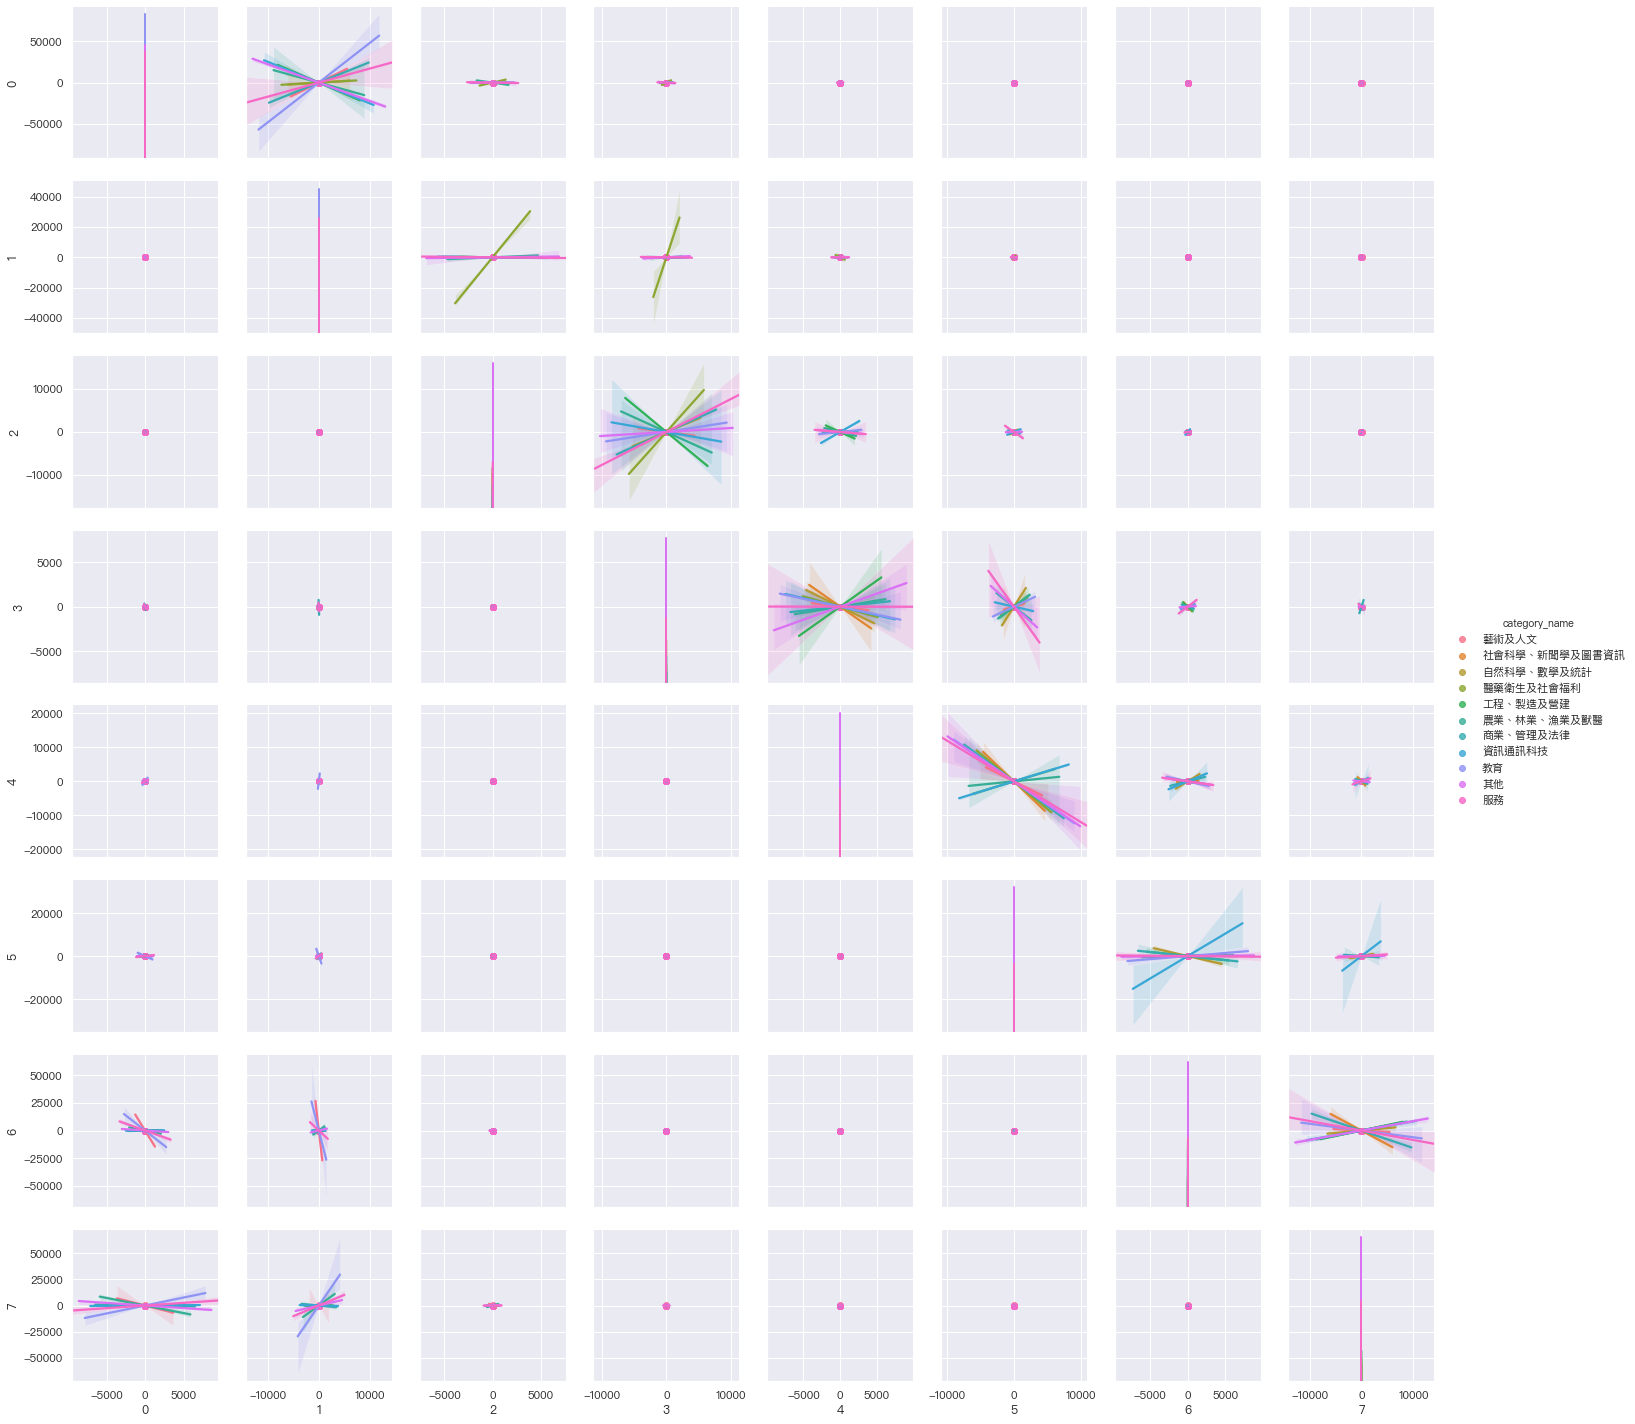

In [138]:
sns.pairplot(matrix_pca8, kind = "reg", hue = "category_name")

➣ 從pairplot可以看得出來如果要將模型最後降維到平面空間，適合選擇的feature subset主要分佈在對角線周圍的features、以及圖形左下角的features，他們能比較有效的將不同的類別區分開來，在這裡我選擇降維後的Feature3和Feature4做視覺化。

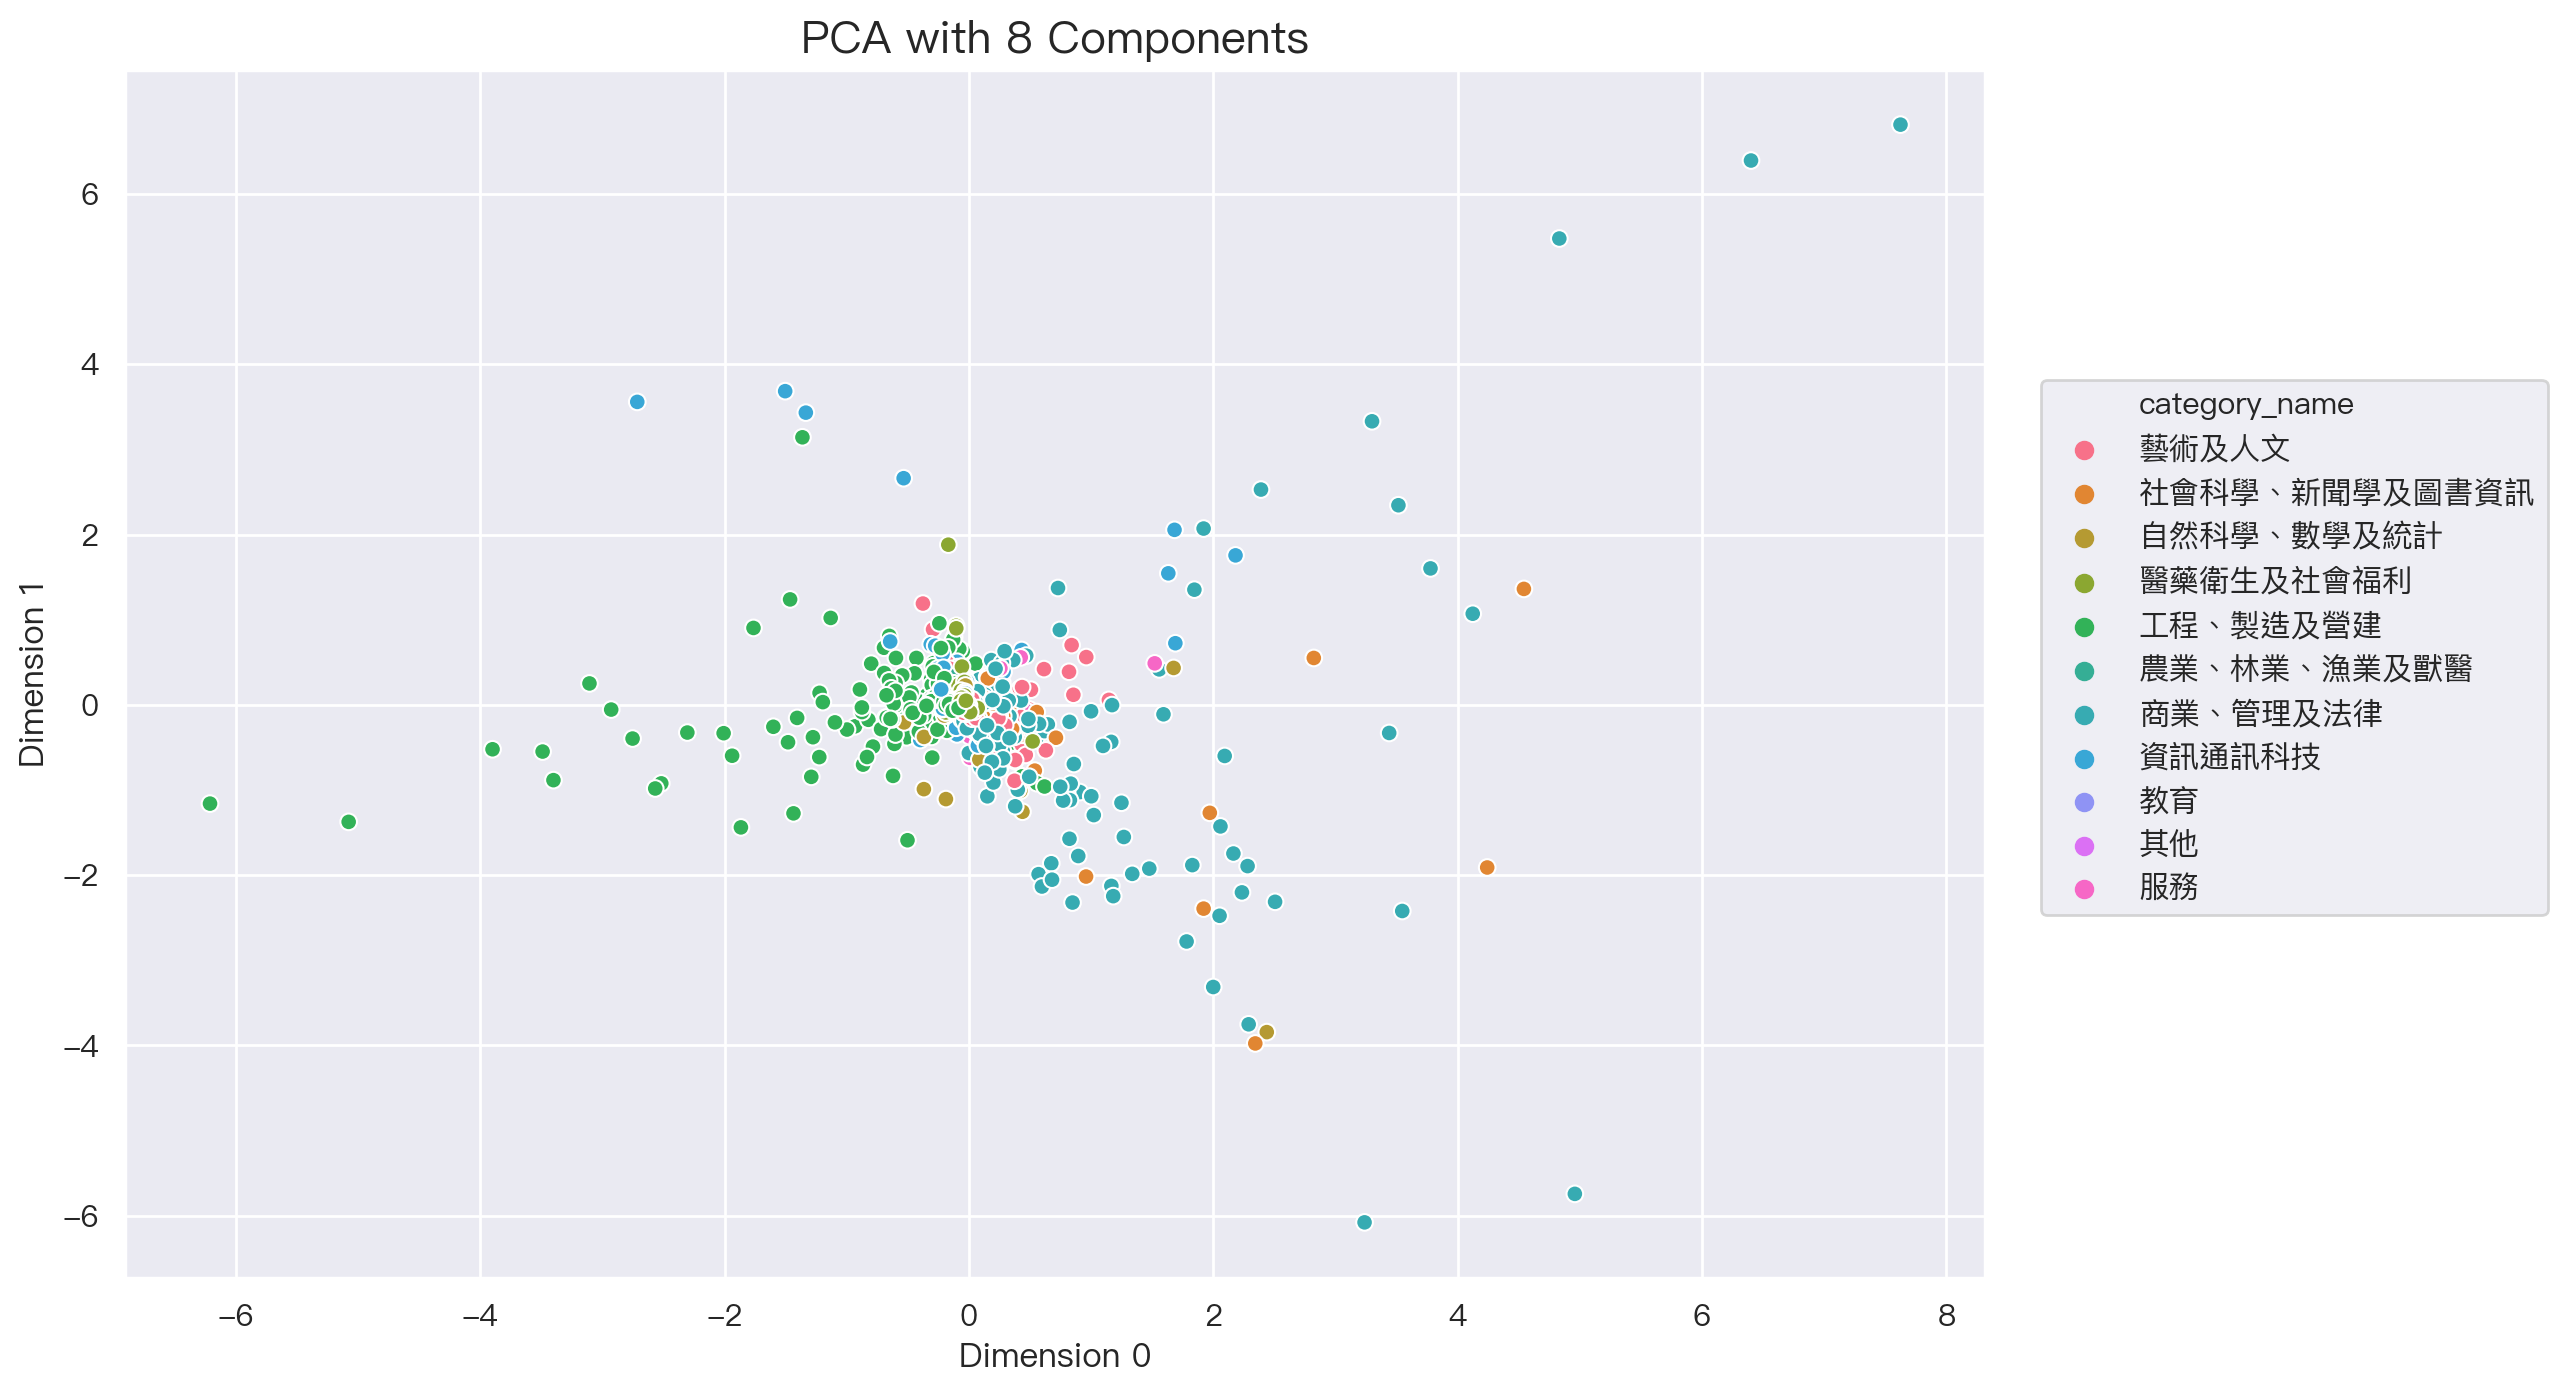

In [70]:
plt.figure(figsize = (12,8), dpi = 200)
sns.scatterplot(x = matrix_pca8.iloc[:, 3], y = matrix_pca8.iloc[:, 4], hue = matrix_pca8["category_name"])
plt.xlabel("Dimension 0")
plt.ylabel("Dimension 1")
plt.title("PCA with 8 Components", fontsize = 16)
plt.legend(loc = (1.03,0.3))
plt.show()

* Q2.2: Visualize academic departments using multiple dimensional scaling. Consider both the metric and non-metric settings. Discuss the result.

In [12]:
# metric MDS
from sklearn.manifold import MDS
mds_m = MDS(metric = True)
matrix_mds_m = mds_m.fit_transform(matrix.iloc[:, :-4])
matrix_mds_m = pd.concat([pd.DataFrame(matrix_mds_m), pd.DataFrame(matrix["category_name"]).reset_index(drop = True)], axis = 1)

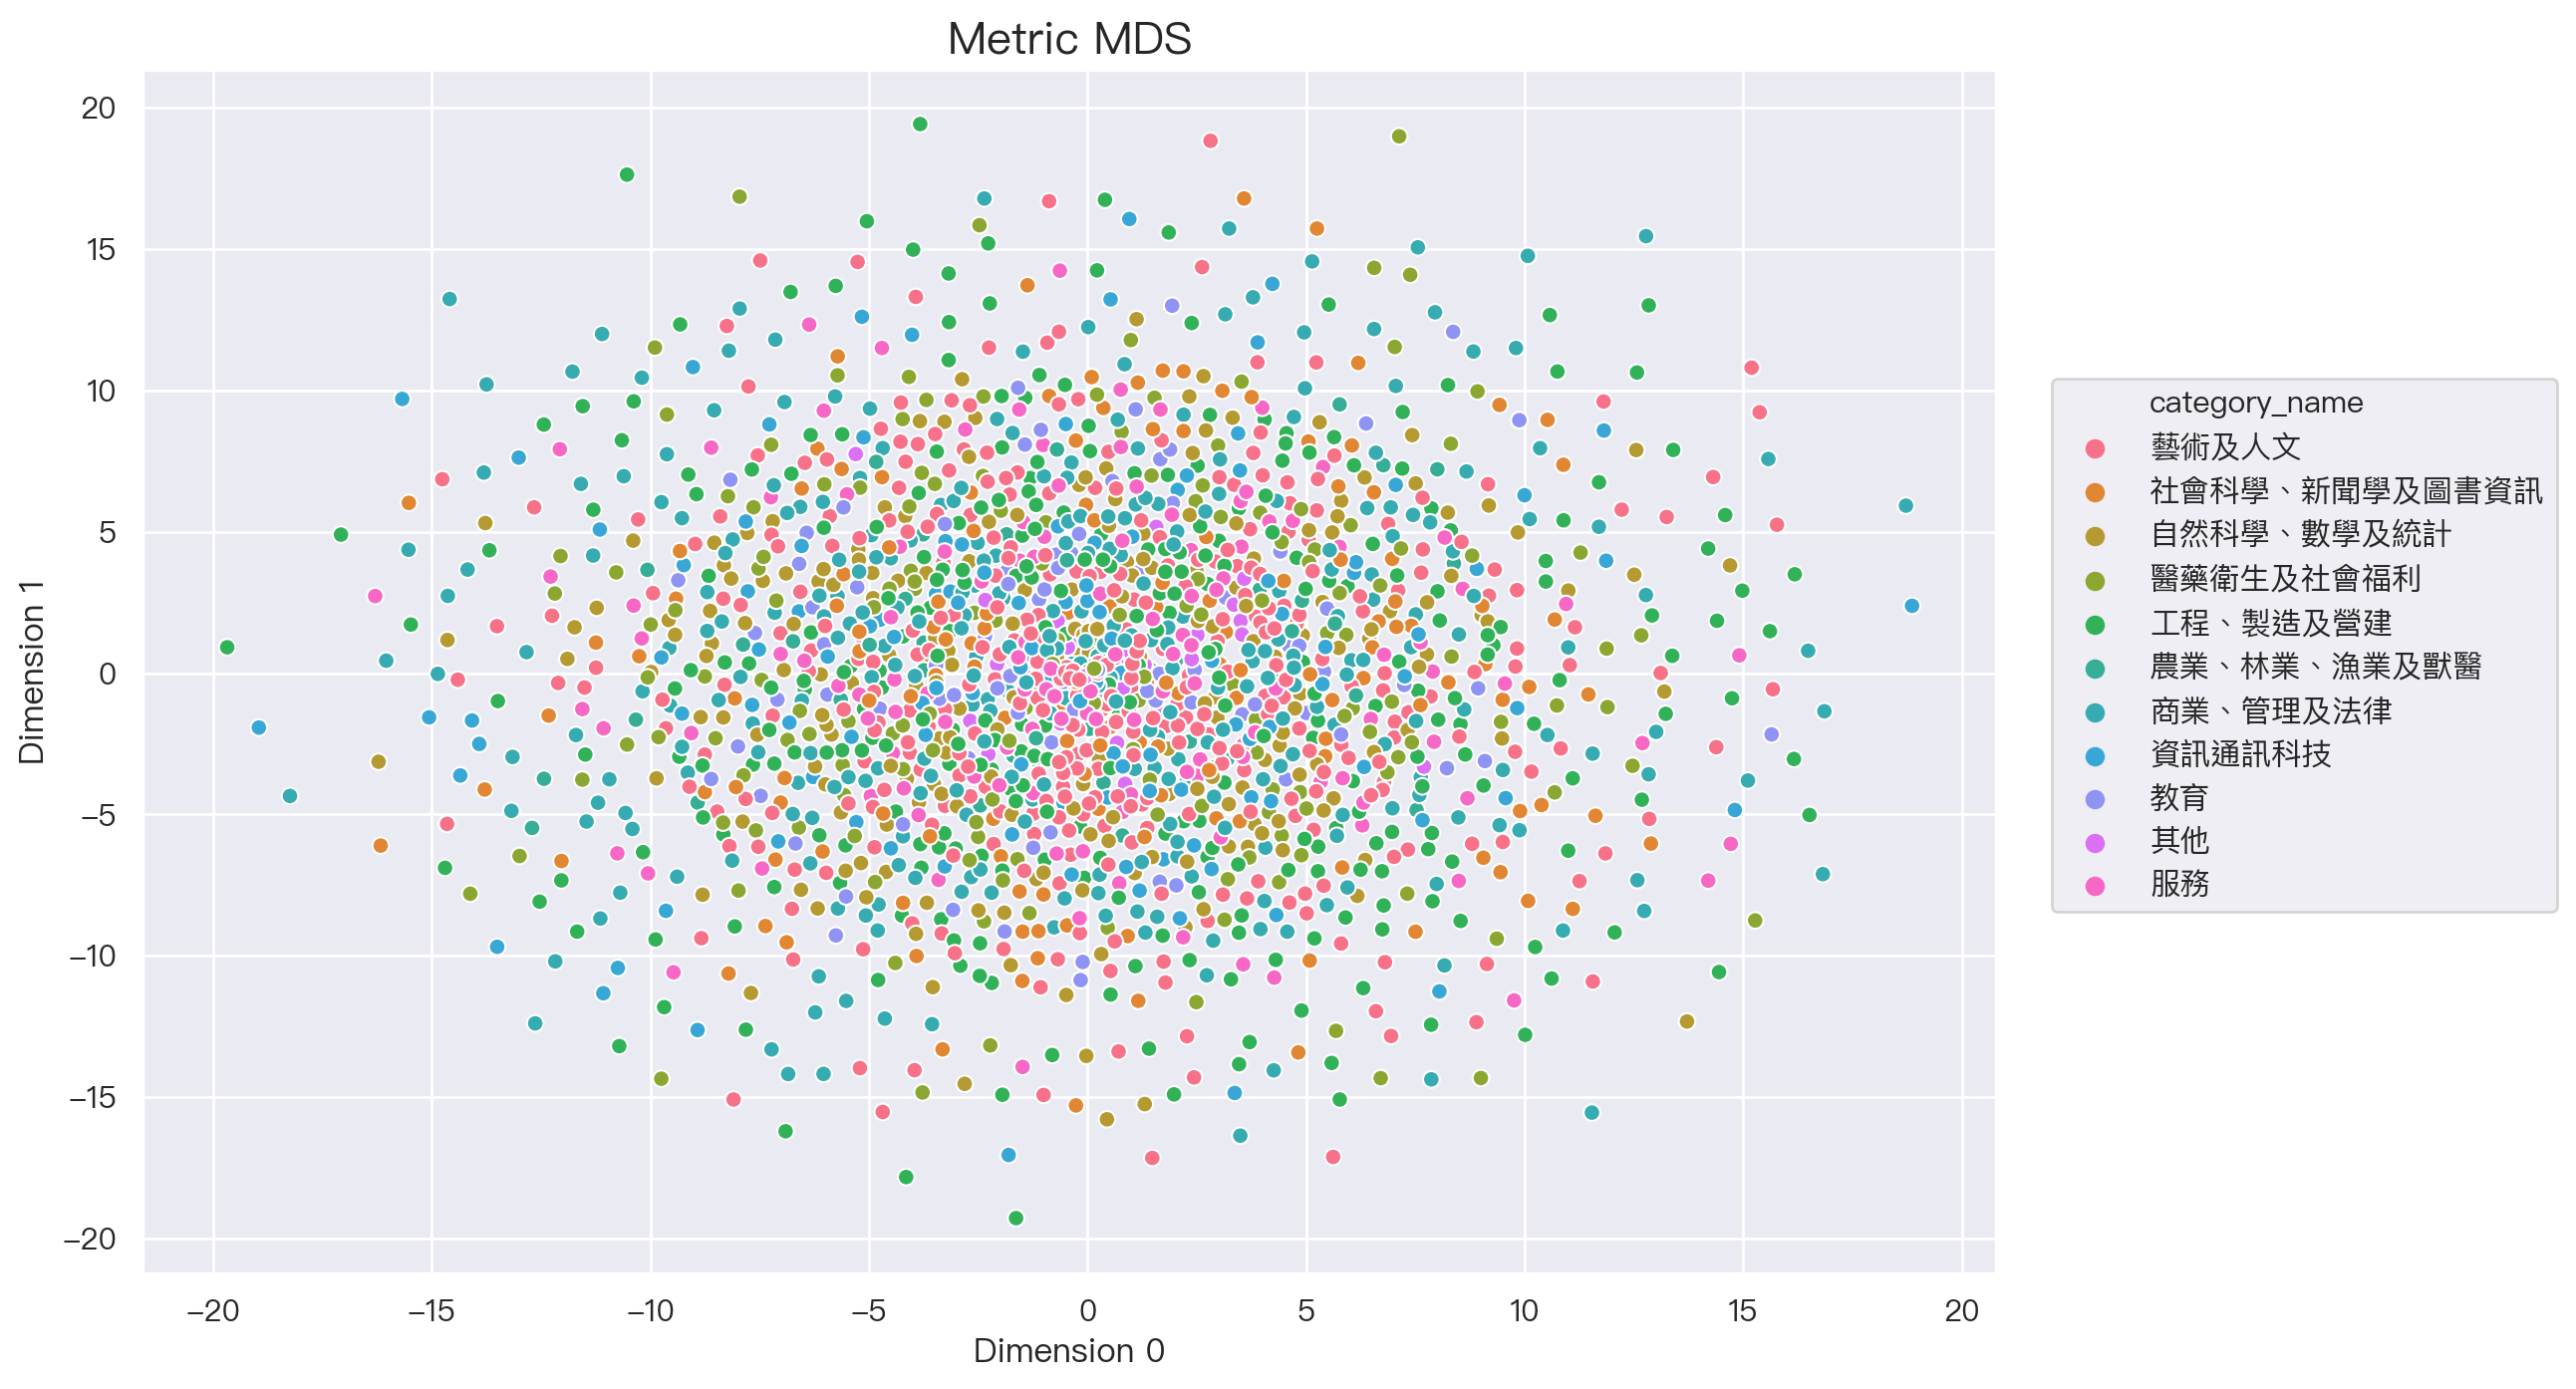

In [59]:
plt.figure(figsize = (12,8), dpi = 200)
sns.scatterplot(x = matrix_mds_m.iloc[:, 0], y = matrix_mds_m.iloc[:, 1], 
                hue = matrix_mds_m["category_name"])
plt.xlabel("Dimension 0")
plt.ylabel("Dimension 1")
plt.title("Metric MDS", fontsize = 16)
plt.legend(loc = (1.03,0.3))
plt.show()

In [51]:
# Non-metric MDS
from sklearn.manifold import MDS
mds_n = MDS(metric = False)
matrix_mds_n = mds_m.fit_transform(matrix.iloc[:, :-4])

In [52]:
matrix_mds_n = pd.concat([pd.DataFrame(matrix_mds_n), pd.DataFrame(matrix["category_name"]).reset_index(drop = True)], axis = 1)

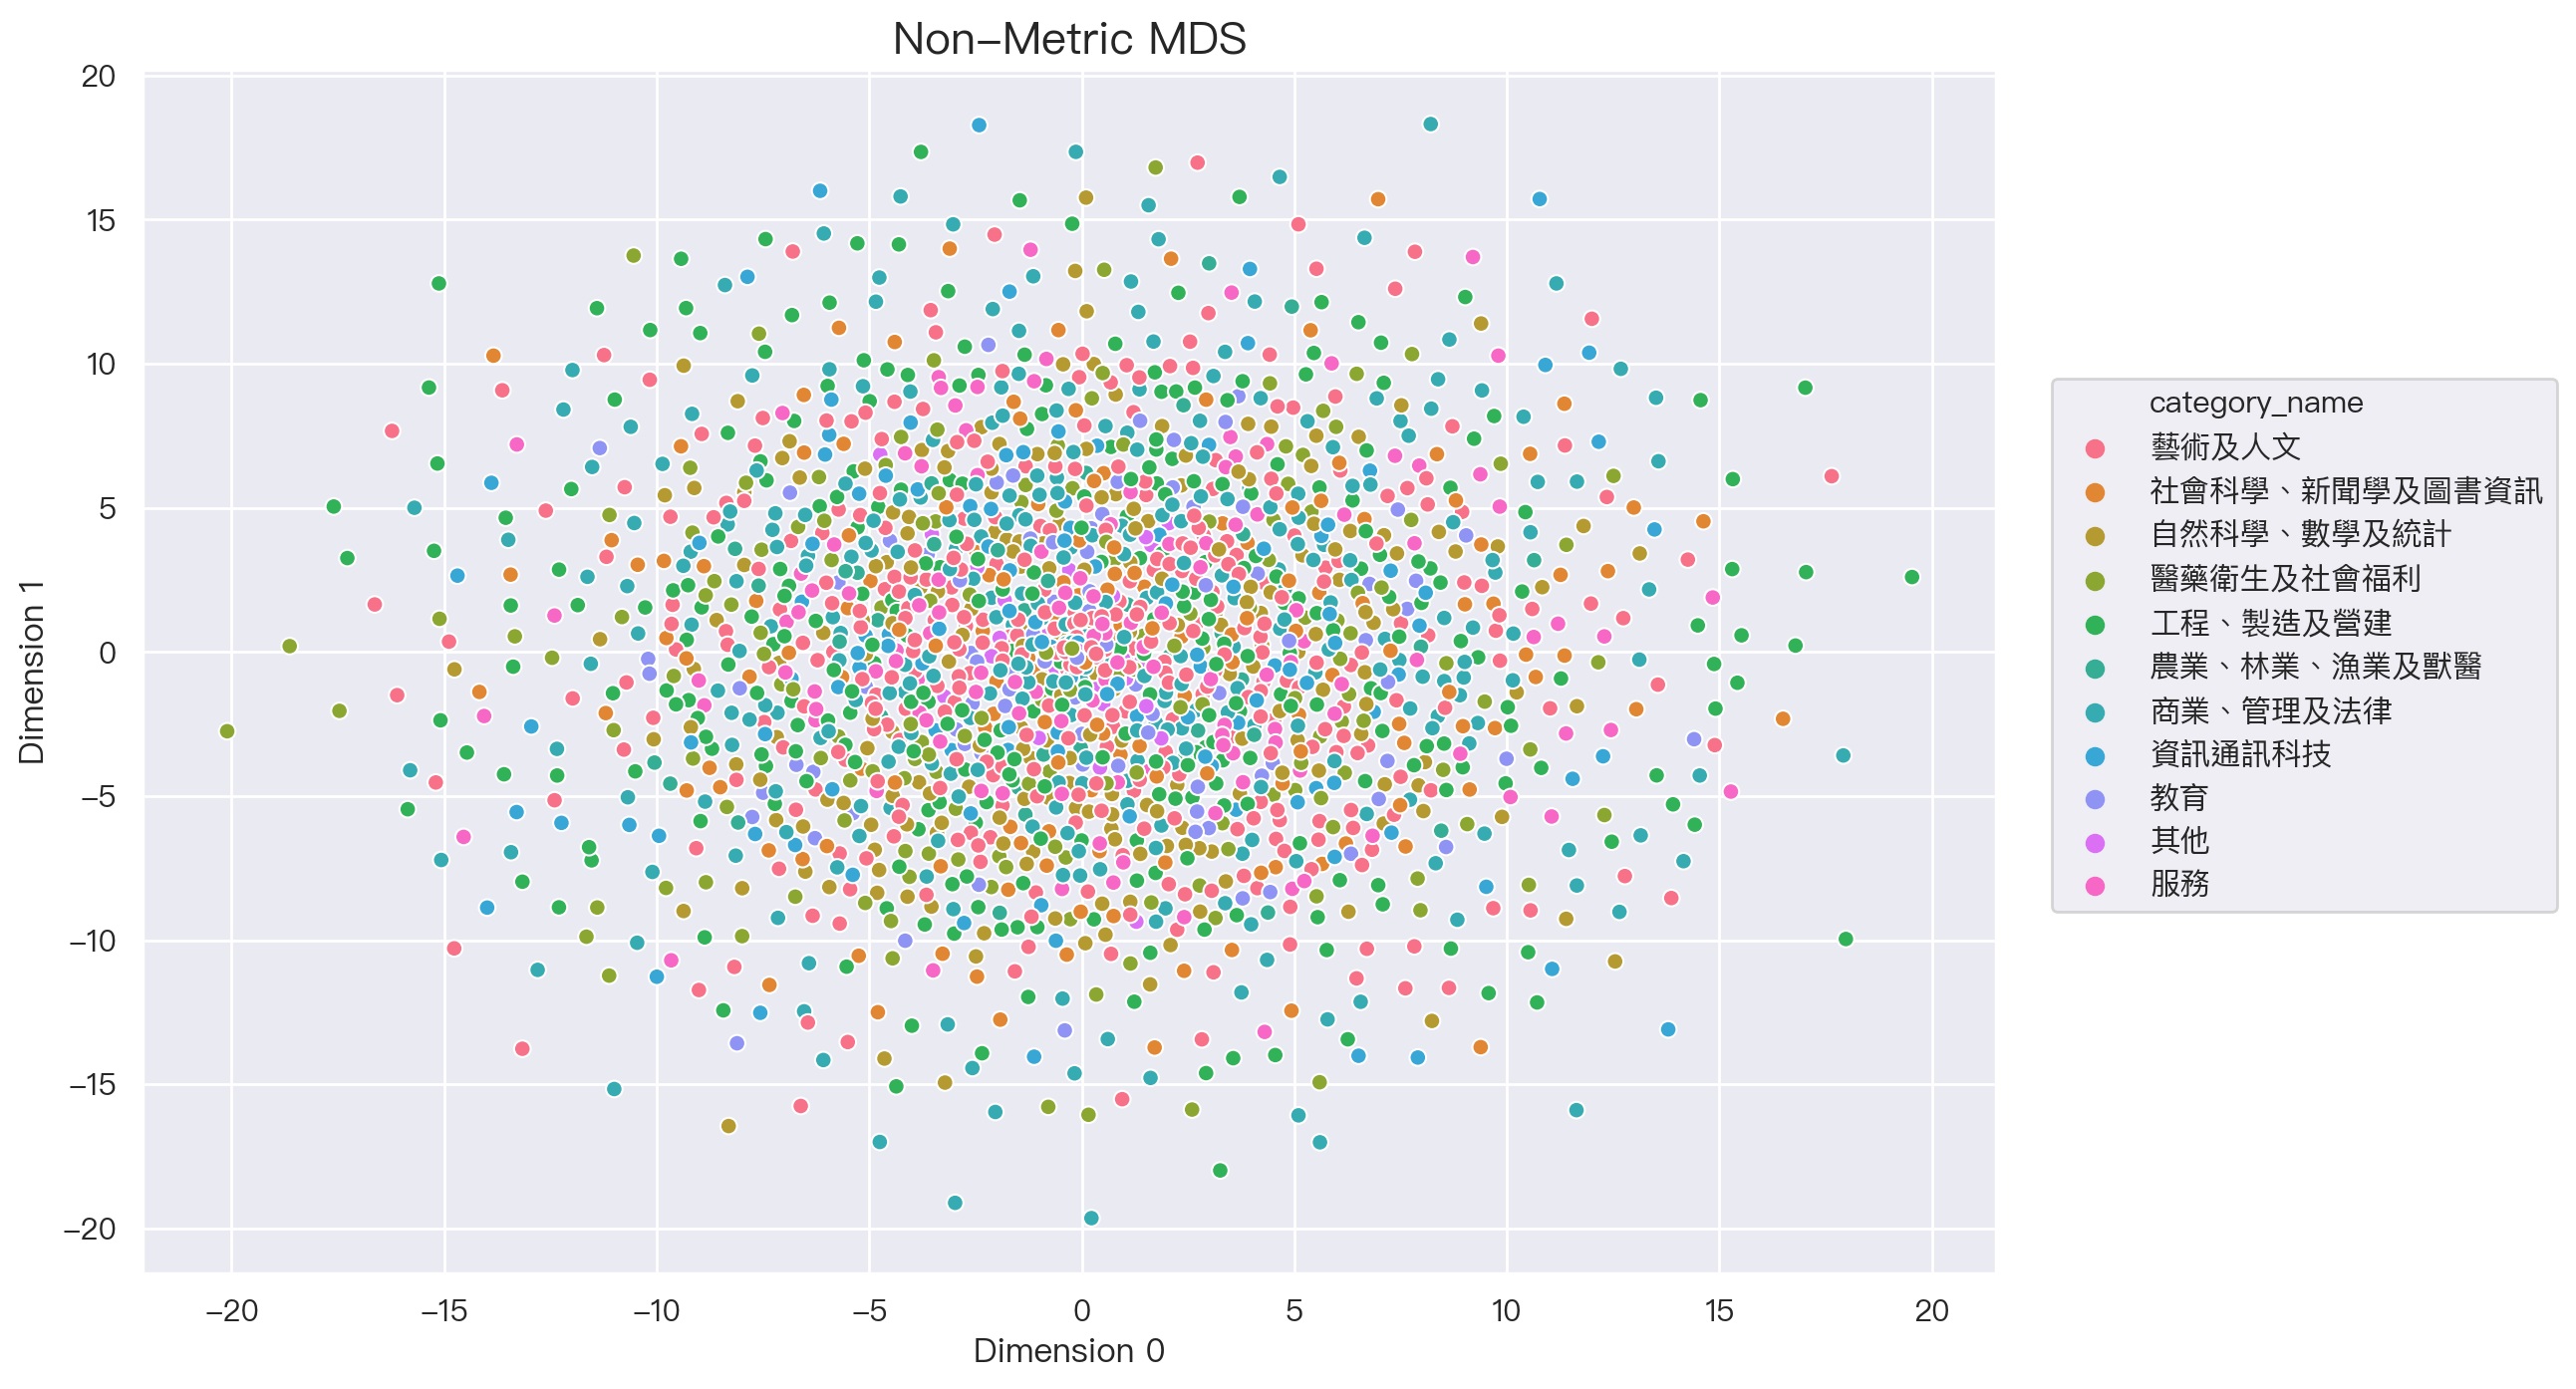

In [60]:
plt.figure(figsize = (12,8), dpi = 200)
sns.scatterplot(x = matrix_mds_n.iloc[:, 0], y = matrix_mds_n.iloc[:, 1], 
                hue = matrix_mds_n["category_name"])
plt.xlabel("Dimension 0")
plt.ylabel("Dimension 1")
plt.title("Non-Metric MDS", fontsize = 16)
plt.legend(loc = (1.03,0.3))
plt.show()

* Q2.3: Visualize academic departments using Locally Linear Embedding. Consider three variations: (1) Use 20 neighbors to construct the weight matrix; (2) Use 40 neighbors to construct the weight matrix; (3) Perform PCA transformation first, and use the first 100 principal components as the input to LLE (with 20 neighbors). Discuss the result.

In [64]:
from sklearn.manifold import LocallyLinearEmbedding

In [65]:
# (1) Use 20 neighbors to construct the weight matrix
LLE20 = LocallyLinearEmbedding(n_neighbors = 20)
matrix_LLE20 = LLE20.fit_transform(matrix.iloc[:, :-4])
matrix_LLE20 = pd.concat([pd.DataFrame(matrix_LLE20), pd.DataFrame(matrix["category_name"]).reset_index(drop = True)], axis = 1)

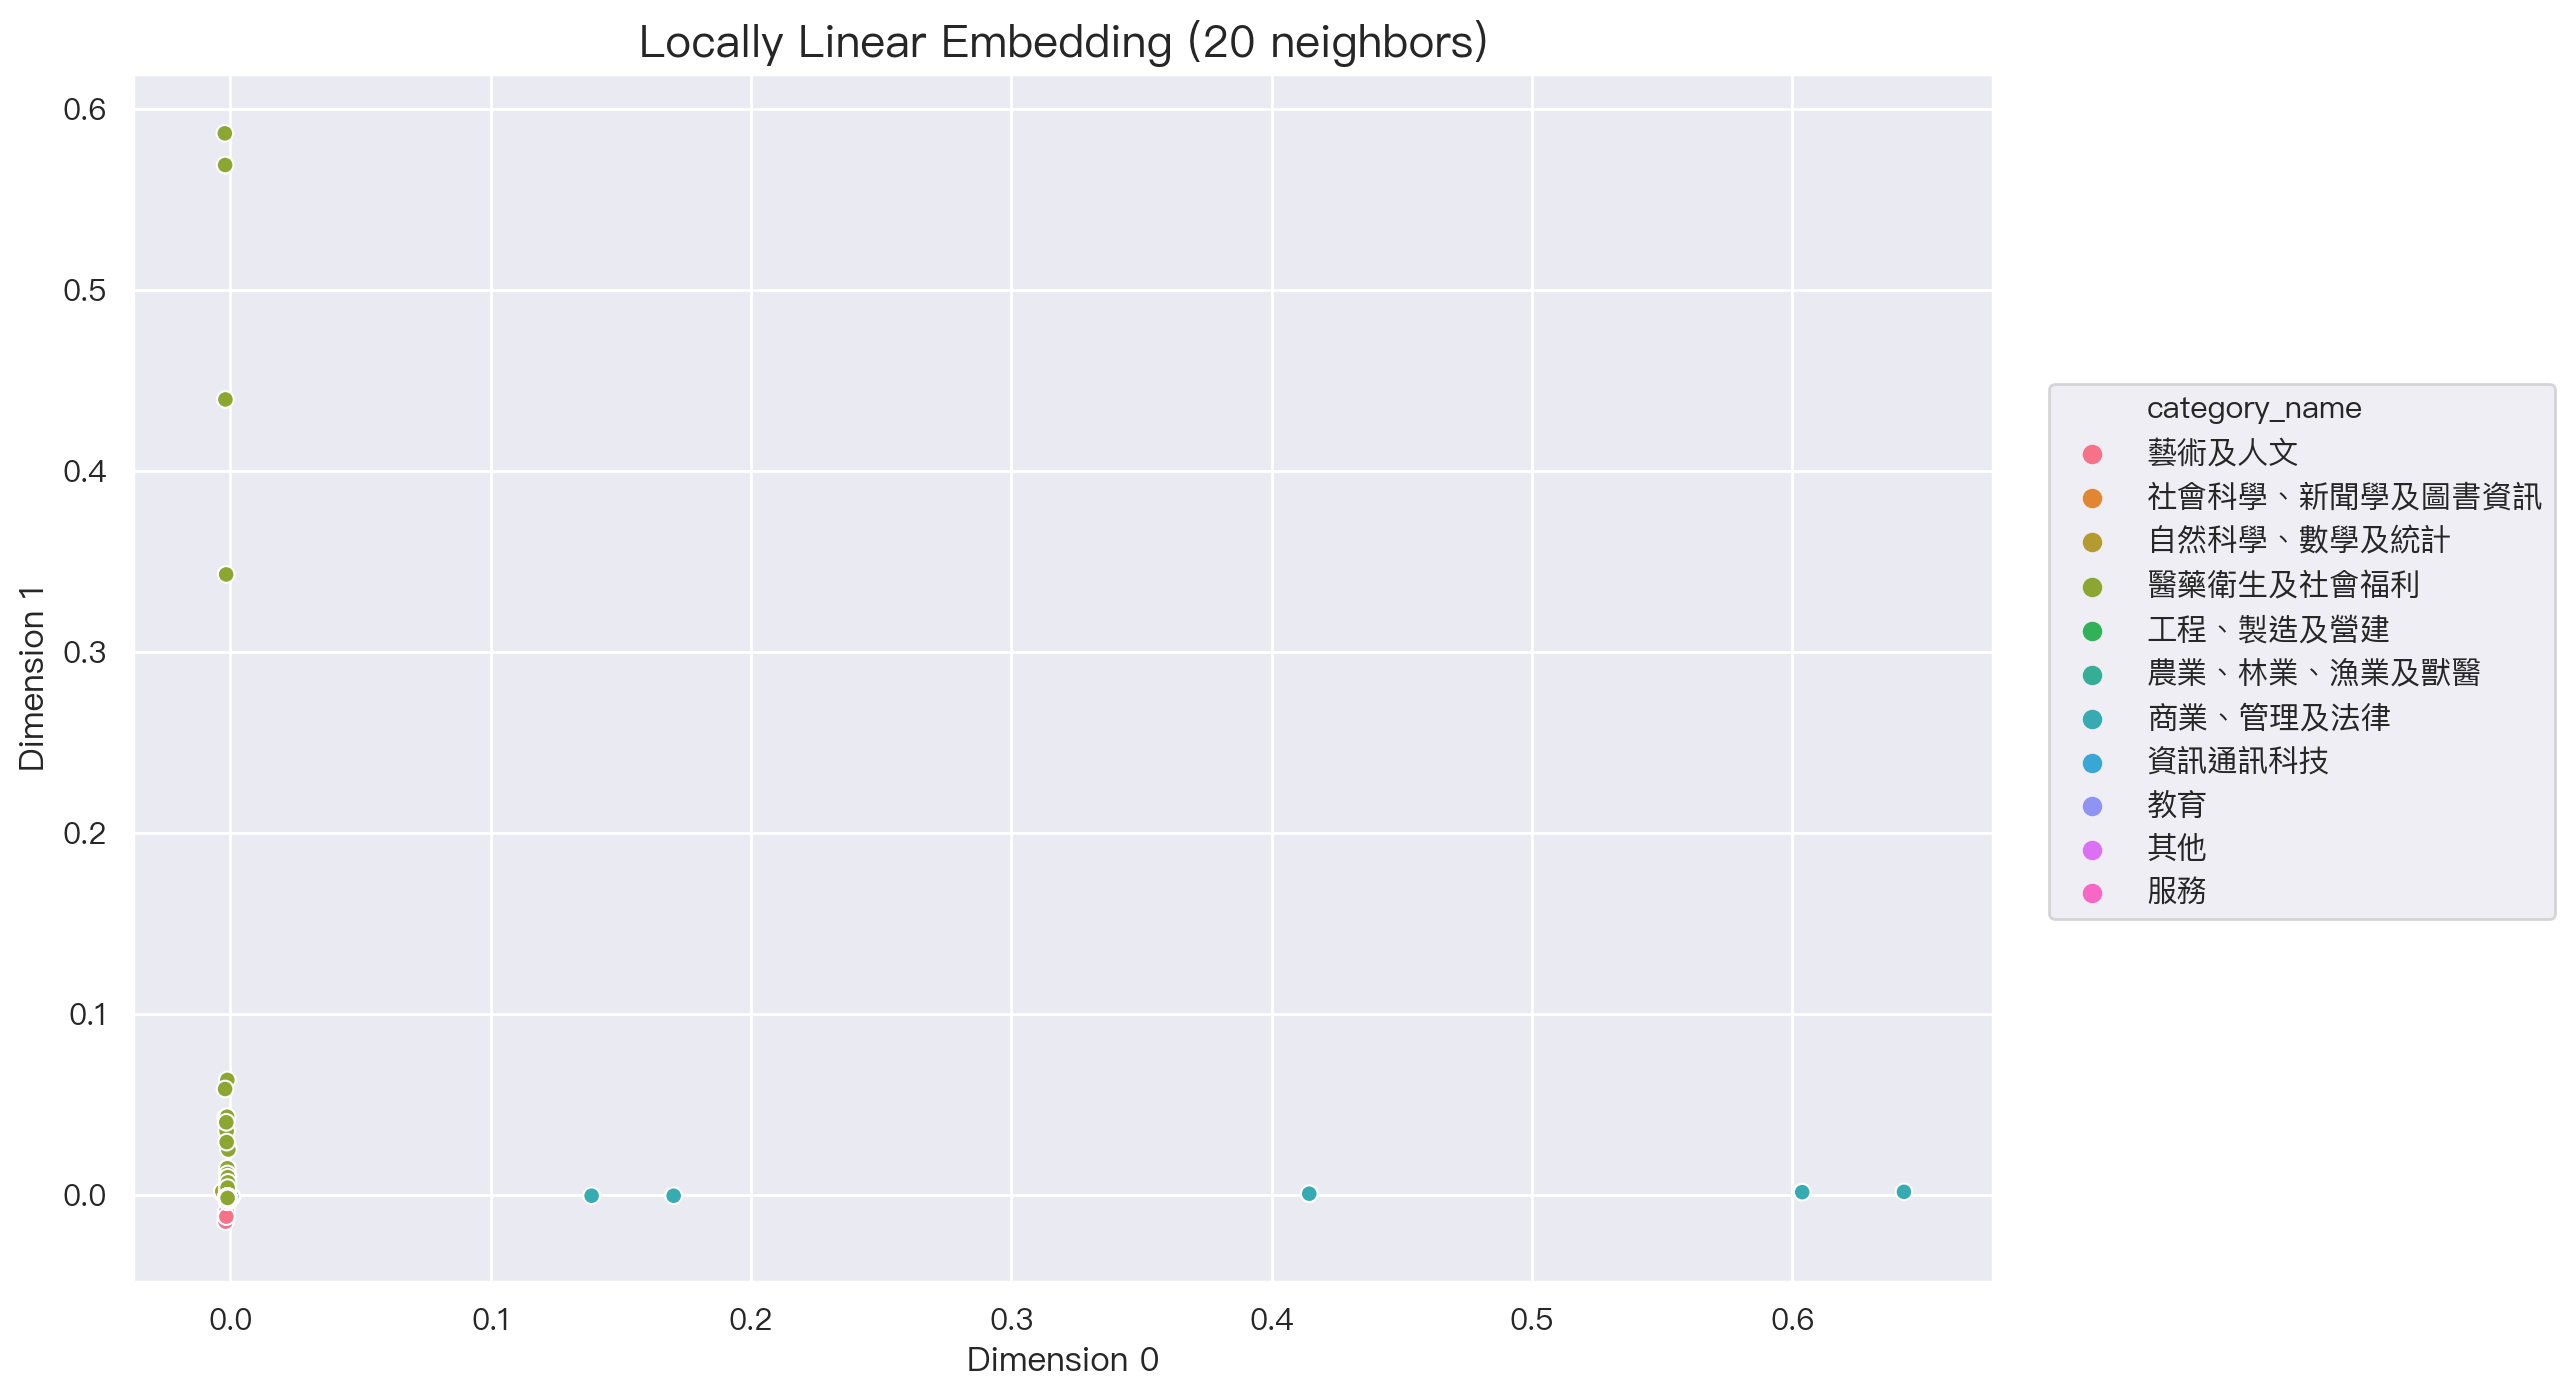

In [80]:
plt.figure(figsize = (12,8), dpi = 200)
sns.scatterplot(x = matrix_LLE20.iloc[:, 0], y = matrix_LLE20.iloc[:, 1], hue = matrix_LLE20["category_name"])
plt.xlabel("Dimension 0")
plt.ylabel("Dimension 1")
plt.title("Locally Linear Embedding (20 neighbors)", fontsize = 16)
plt.legend(loc = (1.03,0.3))
plt.show()

In [82]:
# (2) Use 40 neighbors to construct the weight matrix
LLE40 = LocallyLinearEmbedding(n_neighbors = 40)
matrix_LLE40 = LLE40.fit_transform(matrix.iloc[:, :-4])
matrix_LLE40 = pd.concat([pd.DataFrame(matrix_LLE40), pd.DataFrame(matrix["category_name"]).reset_index(drop = True)], axis = 1)

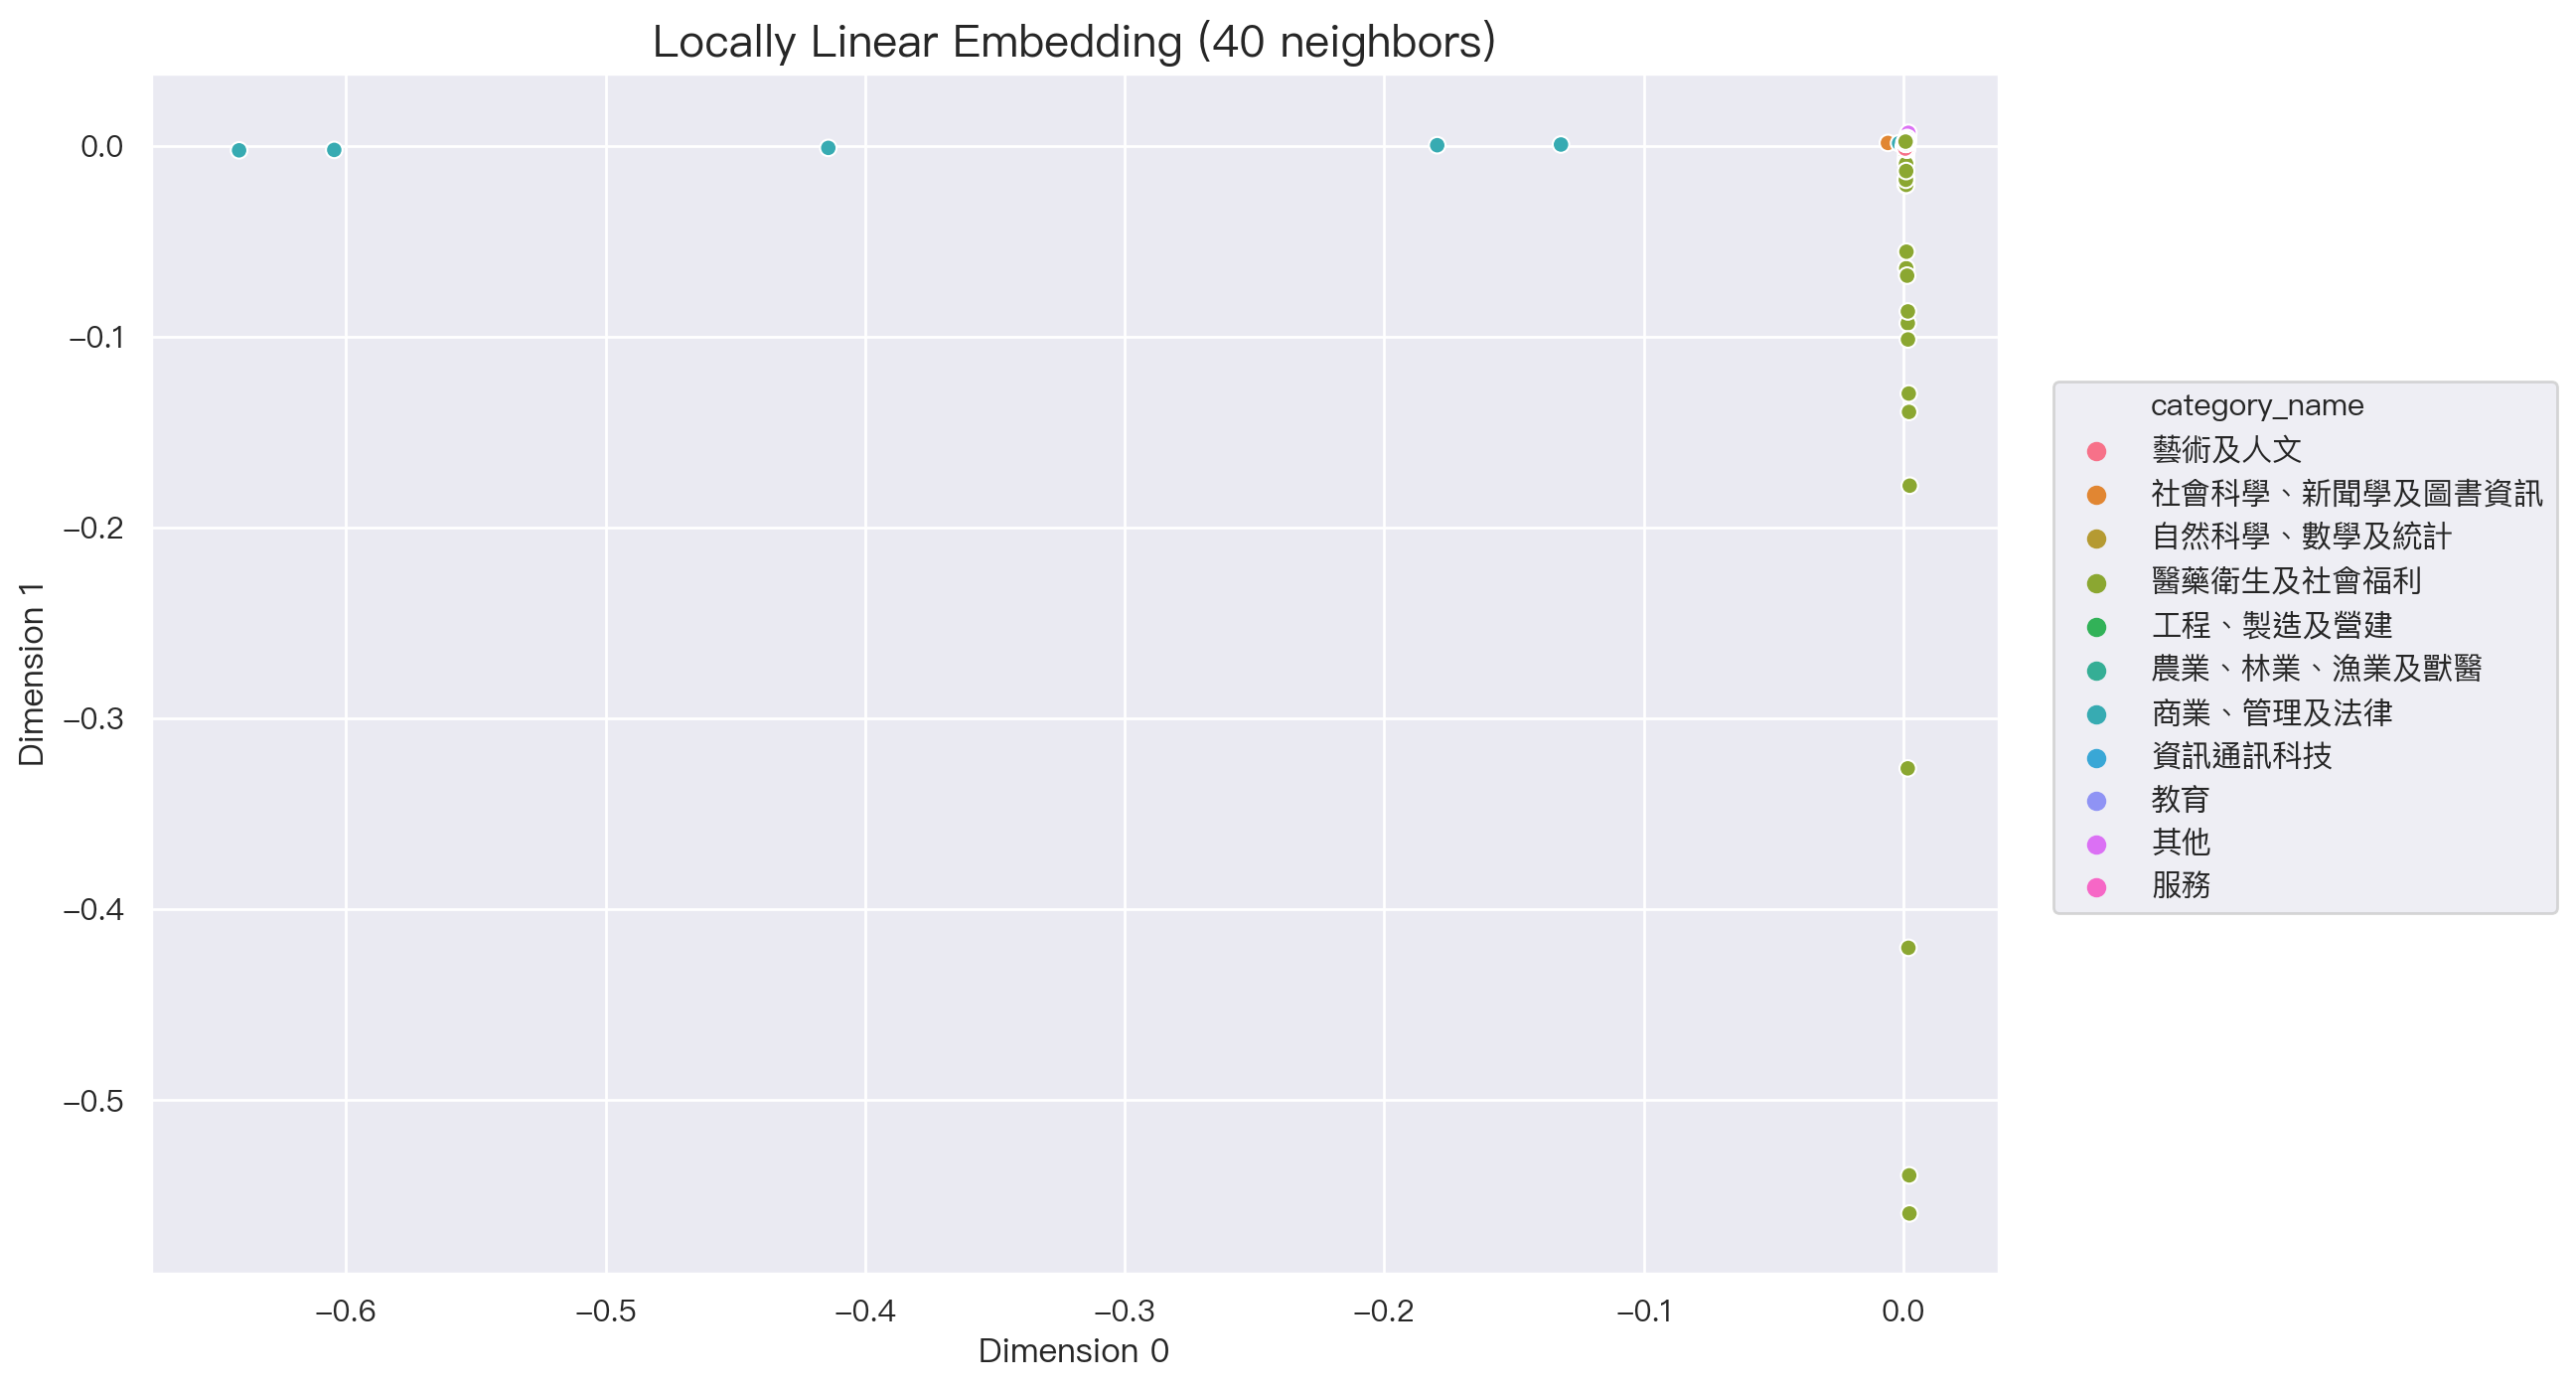

In [84]:
plt.figure(figsize = (12,8), dpi = 200)
sns.scatterplot(x = matrix_LLE40.iloc[:, 0], y = matrix_LLE40.iloc[:, 1], hue = matrix_LLE40["category_name"])
plt.xlabel("Dimension 0")
plt.ylabel("Dimension 1")
plt.title("Locally Linear Embedding (40 neighbors)", fontsize = 16)
plt.legend(loc = (1.03,0.3))
plt.show()

In [83]:
# (3) Perform PCA transformation first, and use the first 100 principal components as the input to LLE (with 20 neighbors).
pca100 = PCA(n_components = 100)
matrix_pca100 = pca100.fit_transform(matrix.iloc[:, :-4])
matrix_pca100_LLE20 = LLE20.fit_transform(matrix_pca100)
matrix_pca100_LLE20 = pd.concat([pd.DataFrame(matrix_pca100_LLE20), pd.DataFrame(matrix["category_name"]).reset_index(drop = True)], axis = 1)

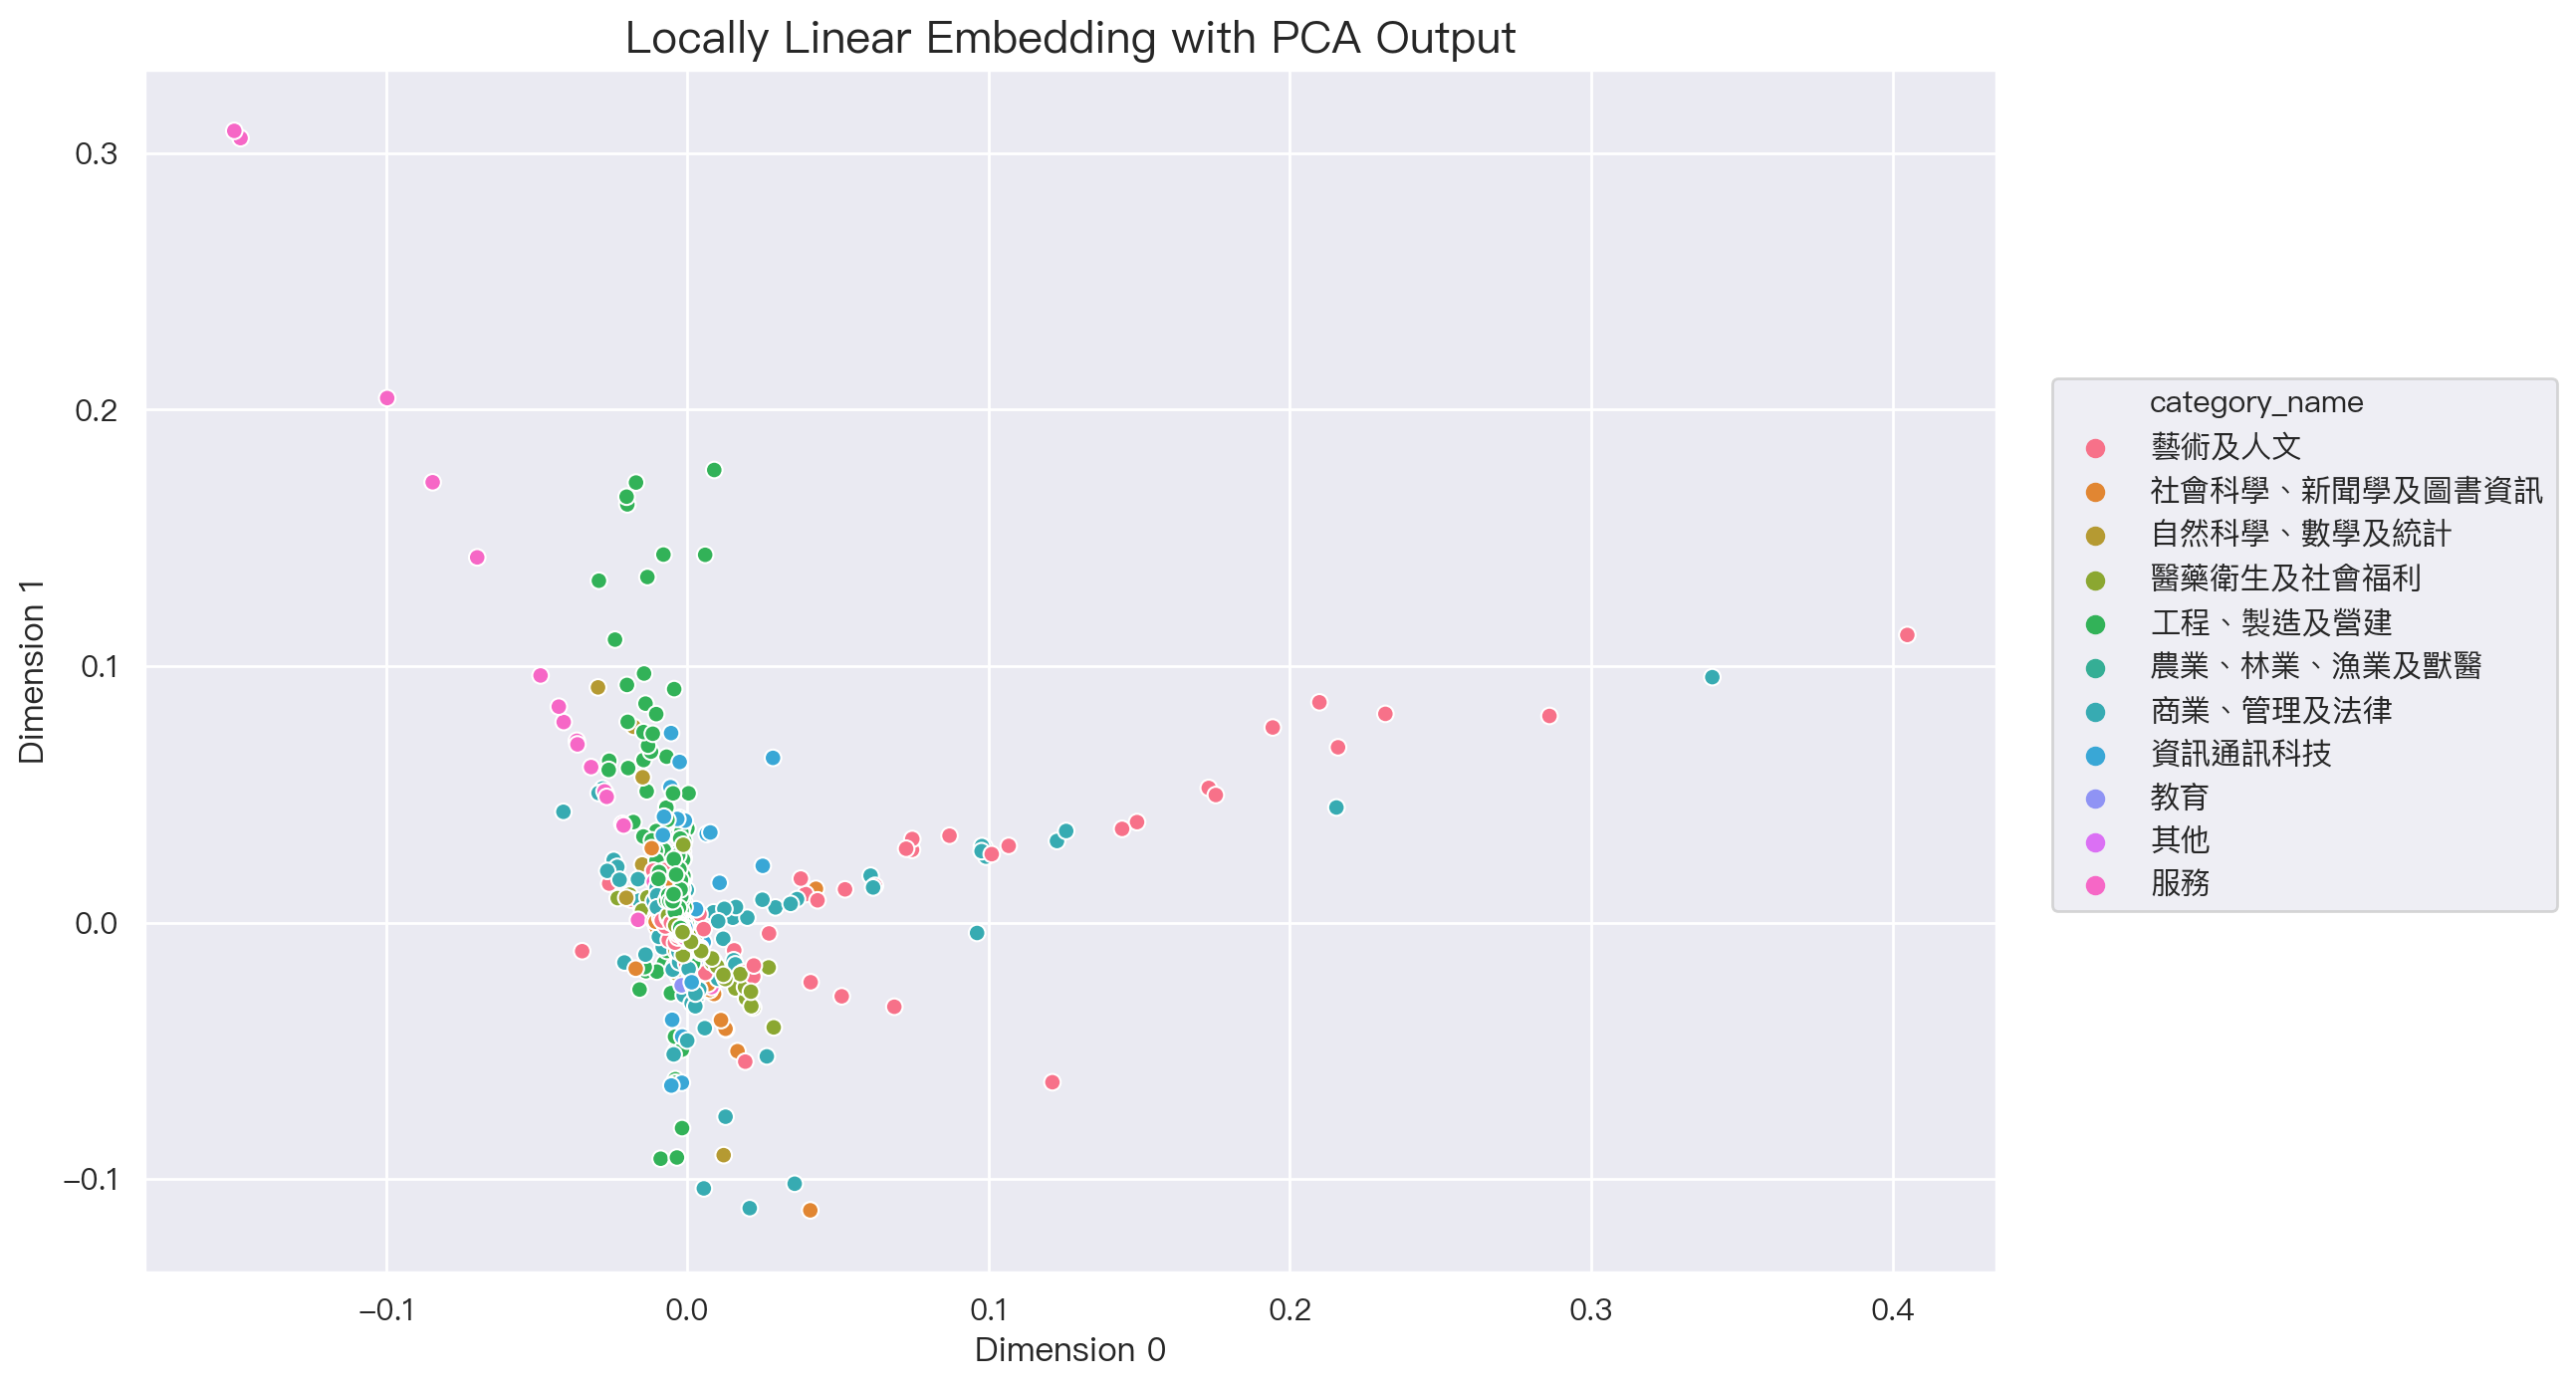

In [85]:
plt.figure(figsize = (12,8), dpi = 200)
sns.scatterplot(x = matrix_pca100_LLE20.iloc[:, 0], y = matrix_pca100_LLE20.iloc[:, 1], hue = matrix_pca100_LLE20["category_name"])
plt.xlabel("Dimension 0")
plt.ylabel("Dimension 1")
plt.title("Locally Linear Embedding with PCA Output", fontsize = 16)
plt.legend(loc = (1.03,0.3))
plt.show()

* Q2.4: Visualize academic departments using Kernel PCA. You should at least consider the RBF and Cosine kernel. It is your responsibility to select reasonably good kernel parameters. Discuss the result.


In [46]:
# With RBF Kernel
kpca_rbf = KernelPCA(kernel = "rbf")
matrix_kpca_rbf = kpca_rbf.fit_transform(matrix.iloc[:, :-4])
matrix_kpca_rbf = pd.concat([pd.DataFrame(matrix_kpca_rbf), pd.DataFrame(matrix["category_name"]).reset_index(drop = True)], axis = 1)

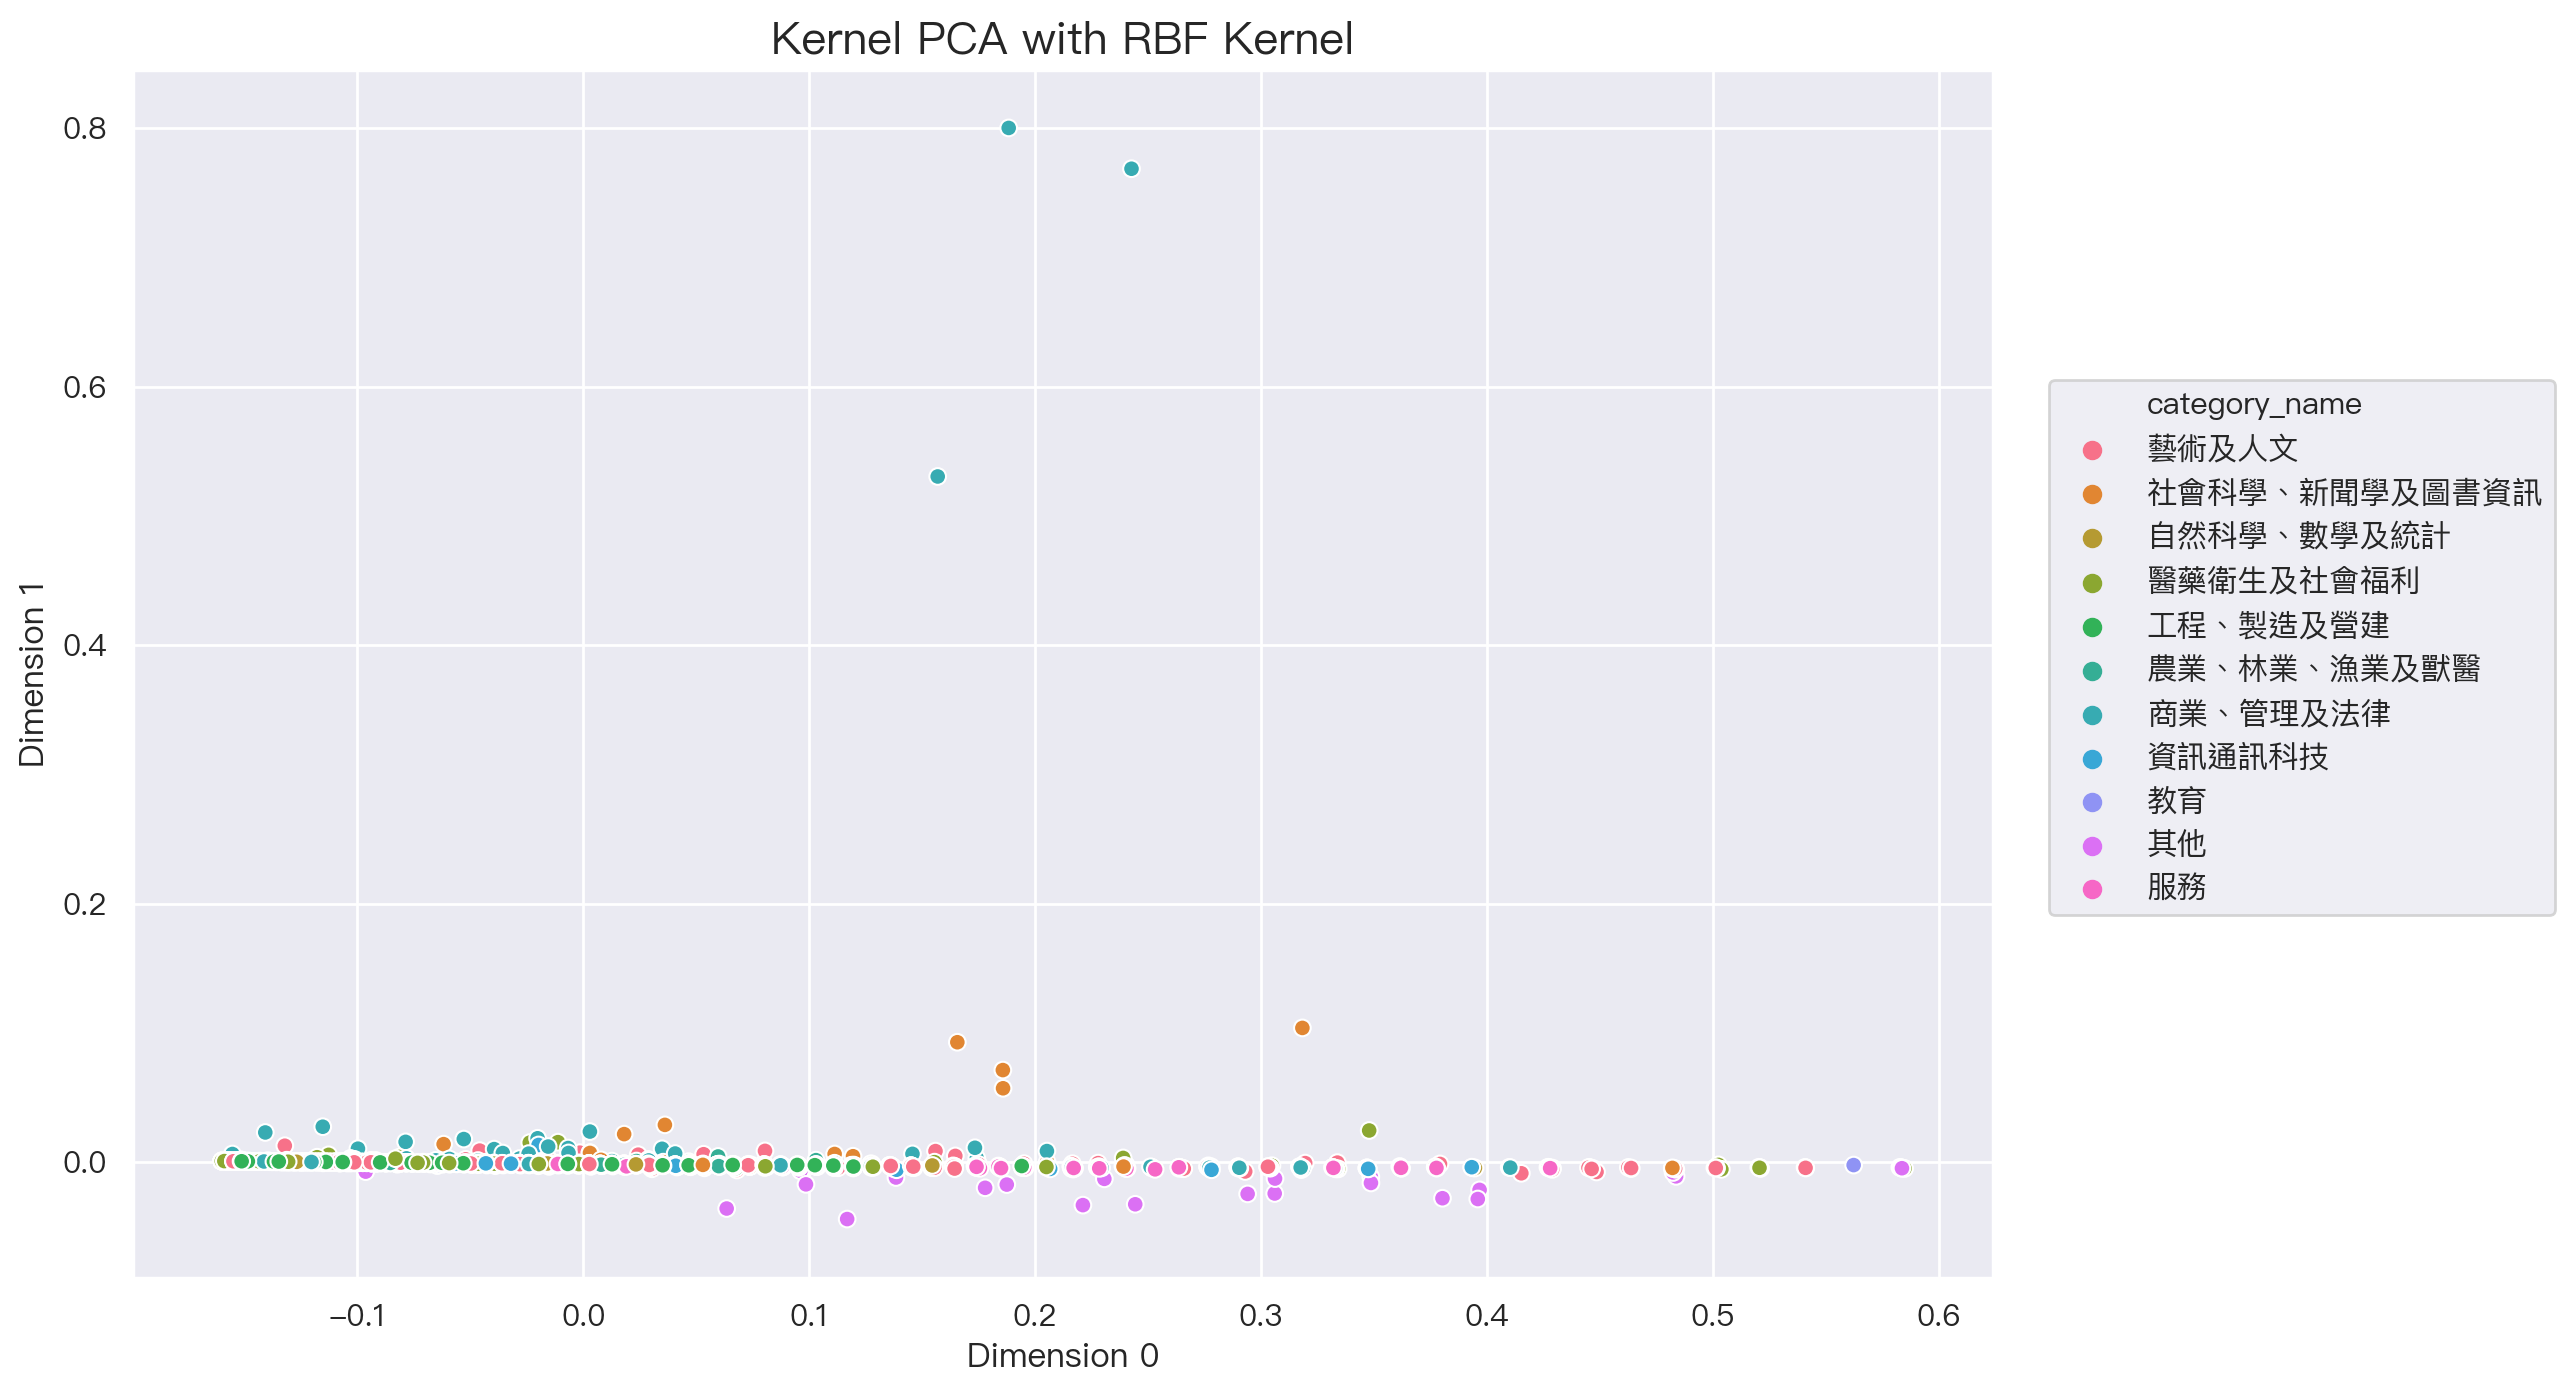

In [47]:
plt.figure(figsize = (12,8), dpi = 200)
sns.scatterplot(x = matrix_kpca_rbf.iloc[:, 0], y = matrix_kpca_rbf.iloc[:, 1], hue = matrix_kpca_rbf["category_name"])
plt.xlabel("Dimension 0")
plt.ylabel("Dimension 1")
plt.title("Kernel PCA with RBF Kernel", fontsize = 16)
plt.legend(loc = (1.03,0.3))
plt.show()

In [48]:
# With Cosine Kernel
kpca_cosine = KernelPCA(kernel = "cosine")
matrix_kpca_cosine = kpca_cosine.fit_transform(matrix.iloc[:, :-4])
matrix_kpca_cosine = pd.concat([pd.DataFrame(matrix_kpca_cosine), pd.DataFrame(matrix["category_name"]).reset_index(drop = True)], axis = 1)

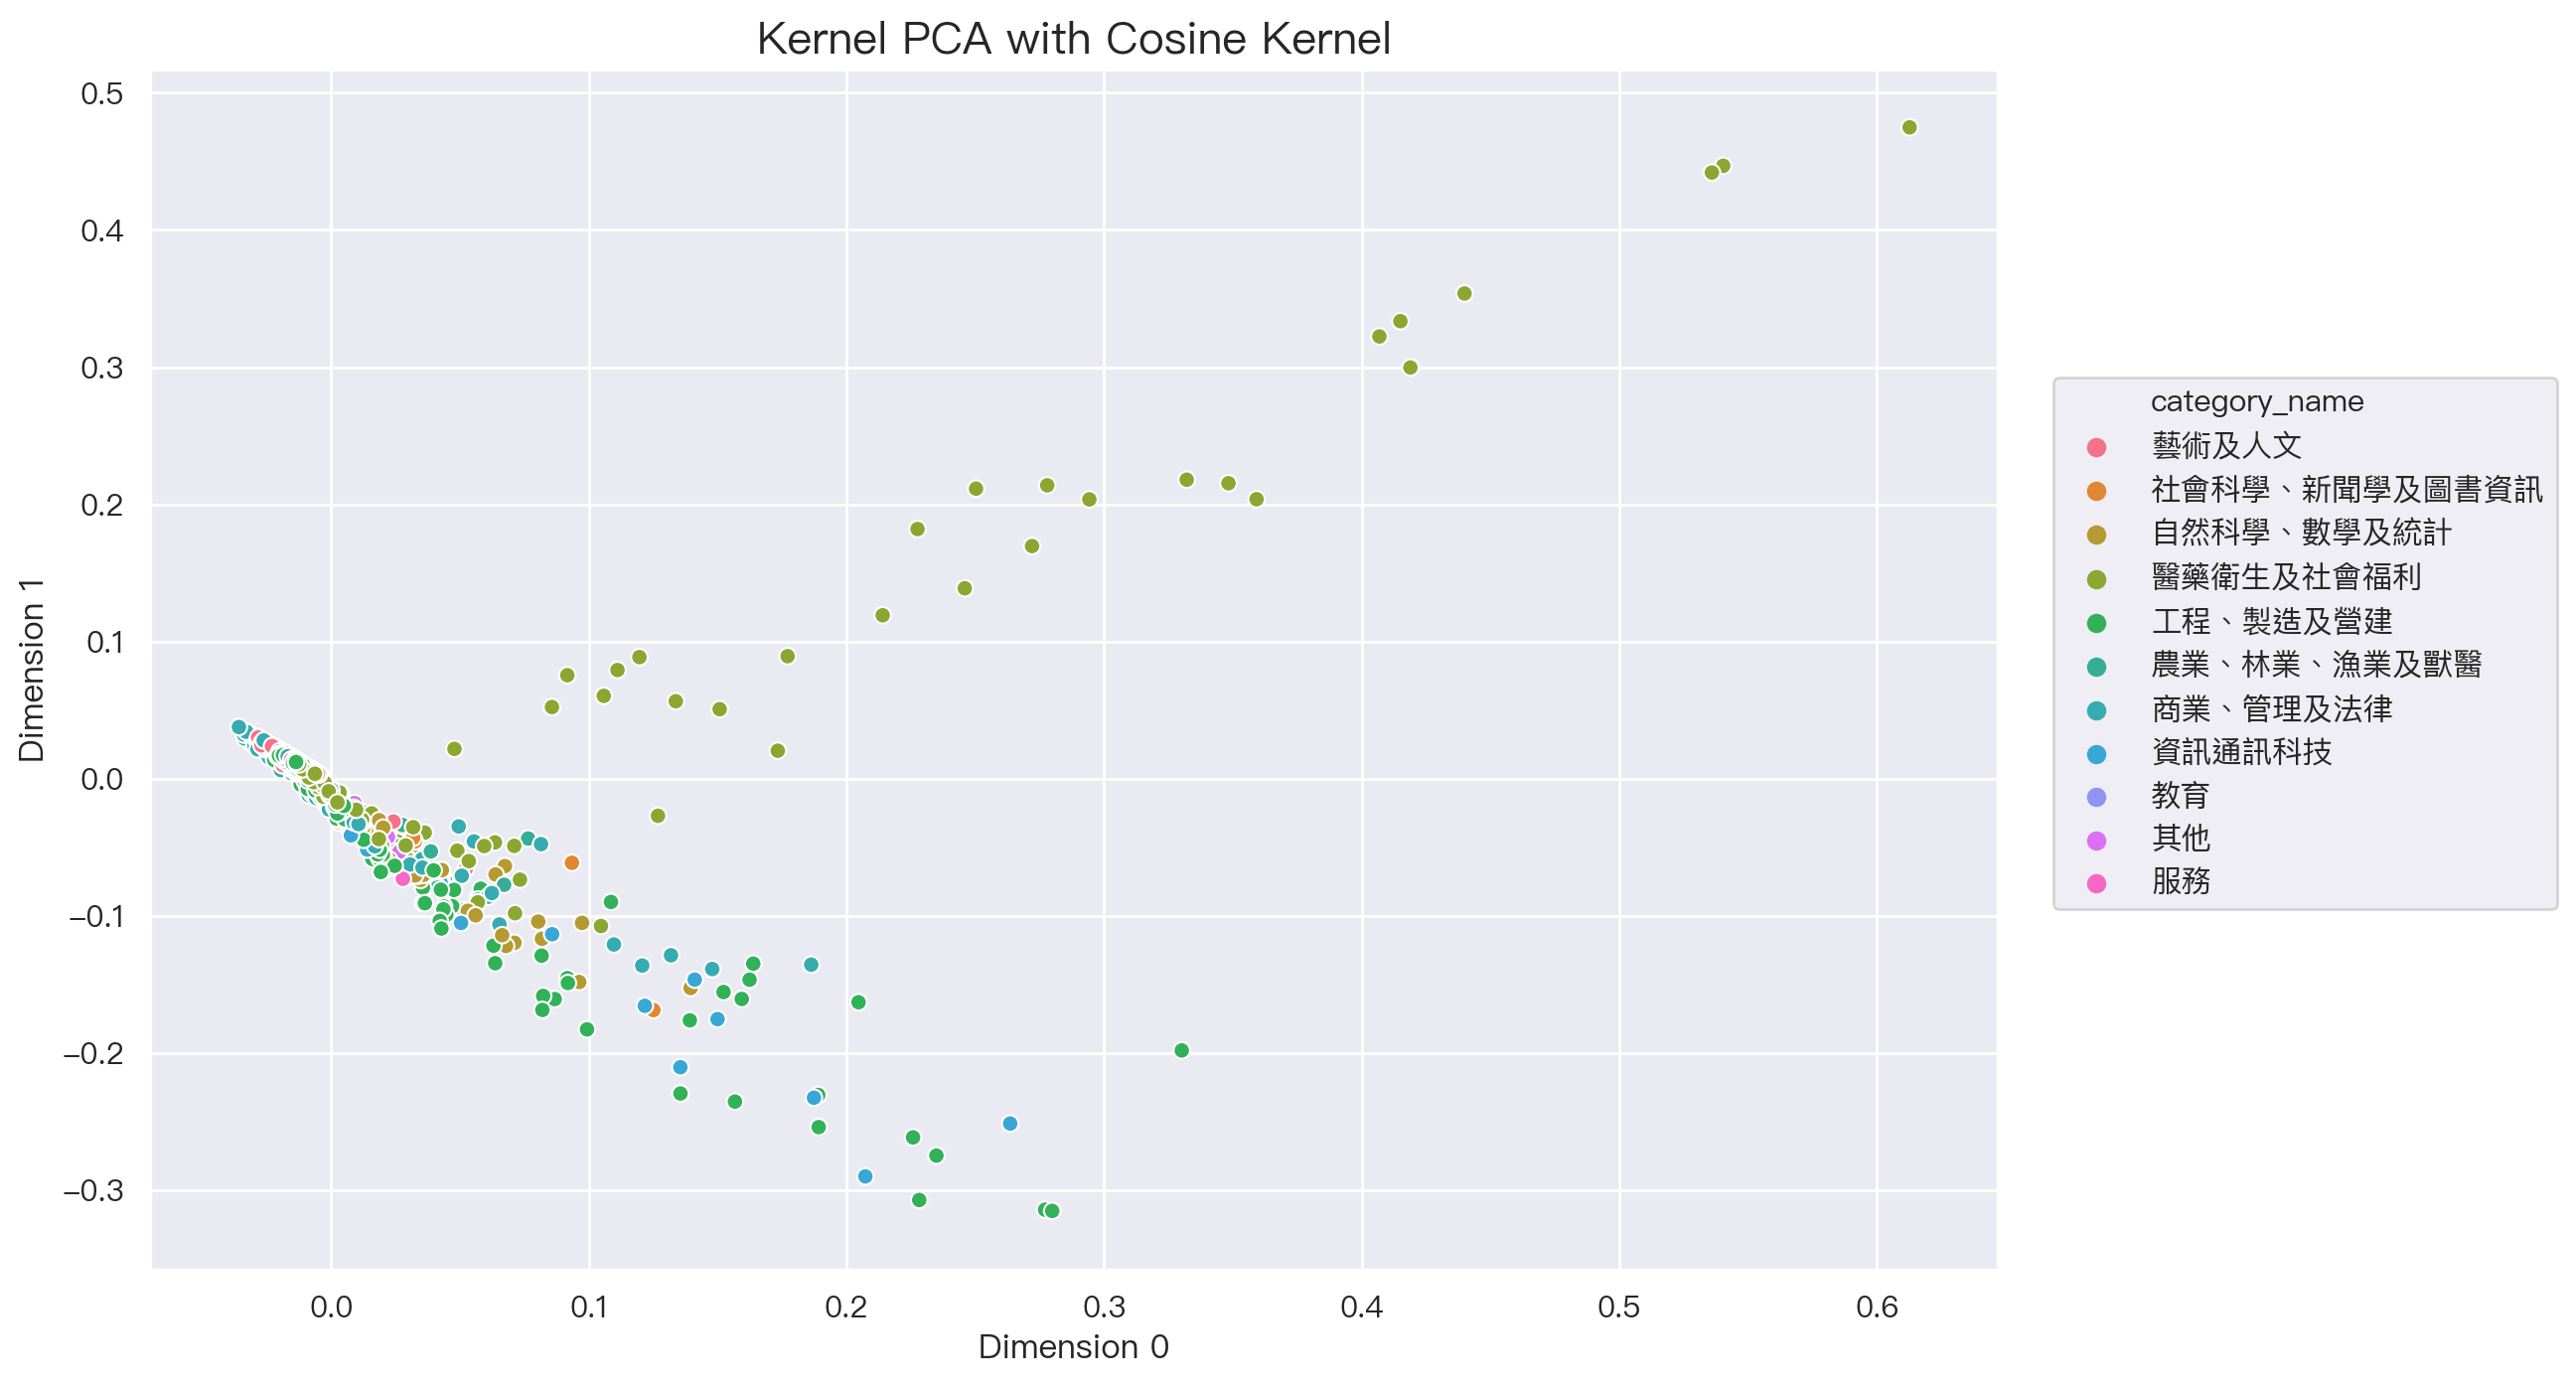

In [49]:
plt.figure(figsize = (12,8), dpi = 200)
sns.scatterplot(x = matrix_kpca_cosine.iloc[:, 0], y = matrix_kpca_cosine.iloc[:, 1], hue = matrix_kpca_cosine["category_name"])
plt.xlabel("Dimension 0")
plt.ylabel("Dimension 1")
plt.title("Kernel PCA with Cosine Kernel", fontsize = 16)
plt.legend(loc = (1.03,0.3))
plt.show()

比較兩個模型，我在做grid search時參考stackoverflow.com上有一篇“Selecting kernel and hyperparameters for kernel PCA reduction”的作法，他的作法是將原始資料點用模型做空間投影後，再來和原始資料點做距離計算。

In [25]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [30]:
def my_scorer(estimator, X):
    X_reduced = estimator.transform(X)
    X_preimage = estimator.inverse_transform(X_reduced)
    return -1 * mean_squared_error(X, X_preimage)

kpca = KernelPCA(fit_inverse_transform = True)
param_grid = [{"gamma": np.linspace(0.03, 0.05, 10), 
               "kernel": ["rbf", "cosine"]}]
grid = GridSearchCV(kpca, param_grid, cv = 3, scoring = my_scorer)
grid.fit(matrix.iloc[:, :-4])

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3,
                                 eigen_solver='auto',
                                 fit_inverse_transform=True, gamma=None,
                                 kernel='linear', kernel_params=None,
                                 max_iter=None, n_components=None, n_jobs=None,
                                 random_state=None, remove_zero_eig=False,
                                 tol=0),
             iid='warn', n_jobs=None,
             param_grid=[{'gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kernel': ['rbf', 'cosine']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=<function my_scorer at 0x115ca5598>, verbose=0)

In [36]:
kpca = KernelPCA(kernel = grid.best_params_["kernel"], gamma = grid.best_params_["gamma"])
matrix_kpca = kpca.fit_transform(matrix.iloc[:, :-4])
matrix_kpca = pd.concat([pd.DataFrame(matrix_kpca), pd.DataFrame(matrix["category_name"]).reset_index(drop = True)], axis = 1)

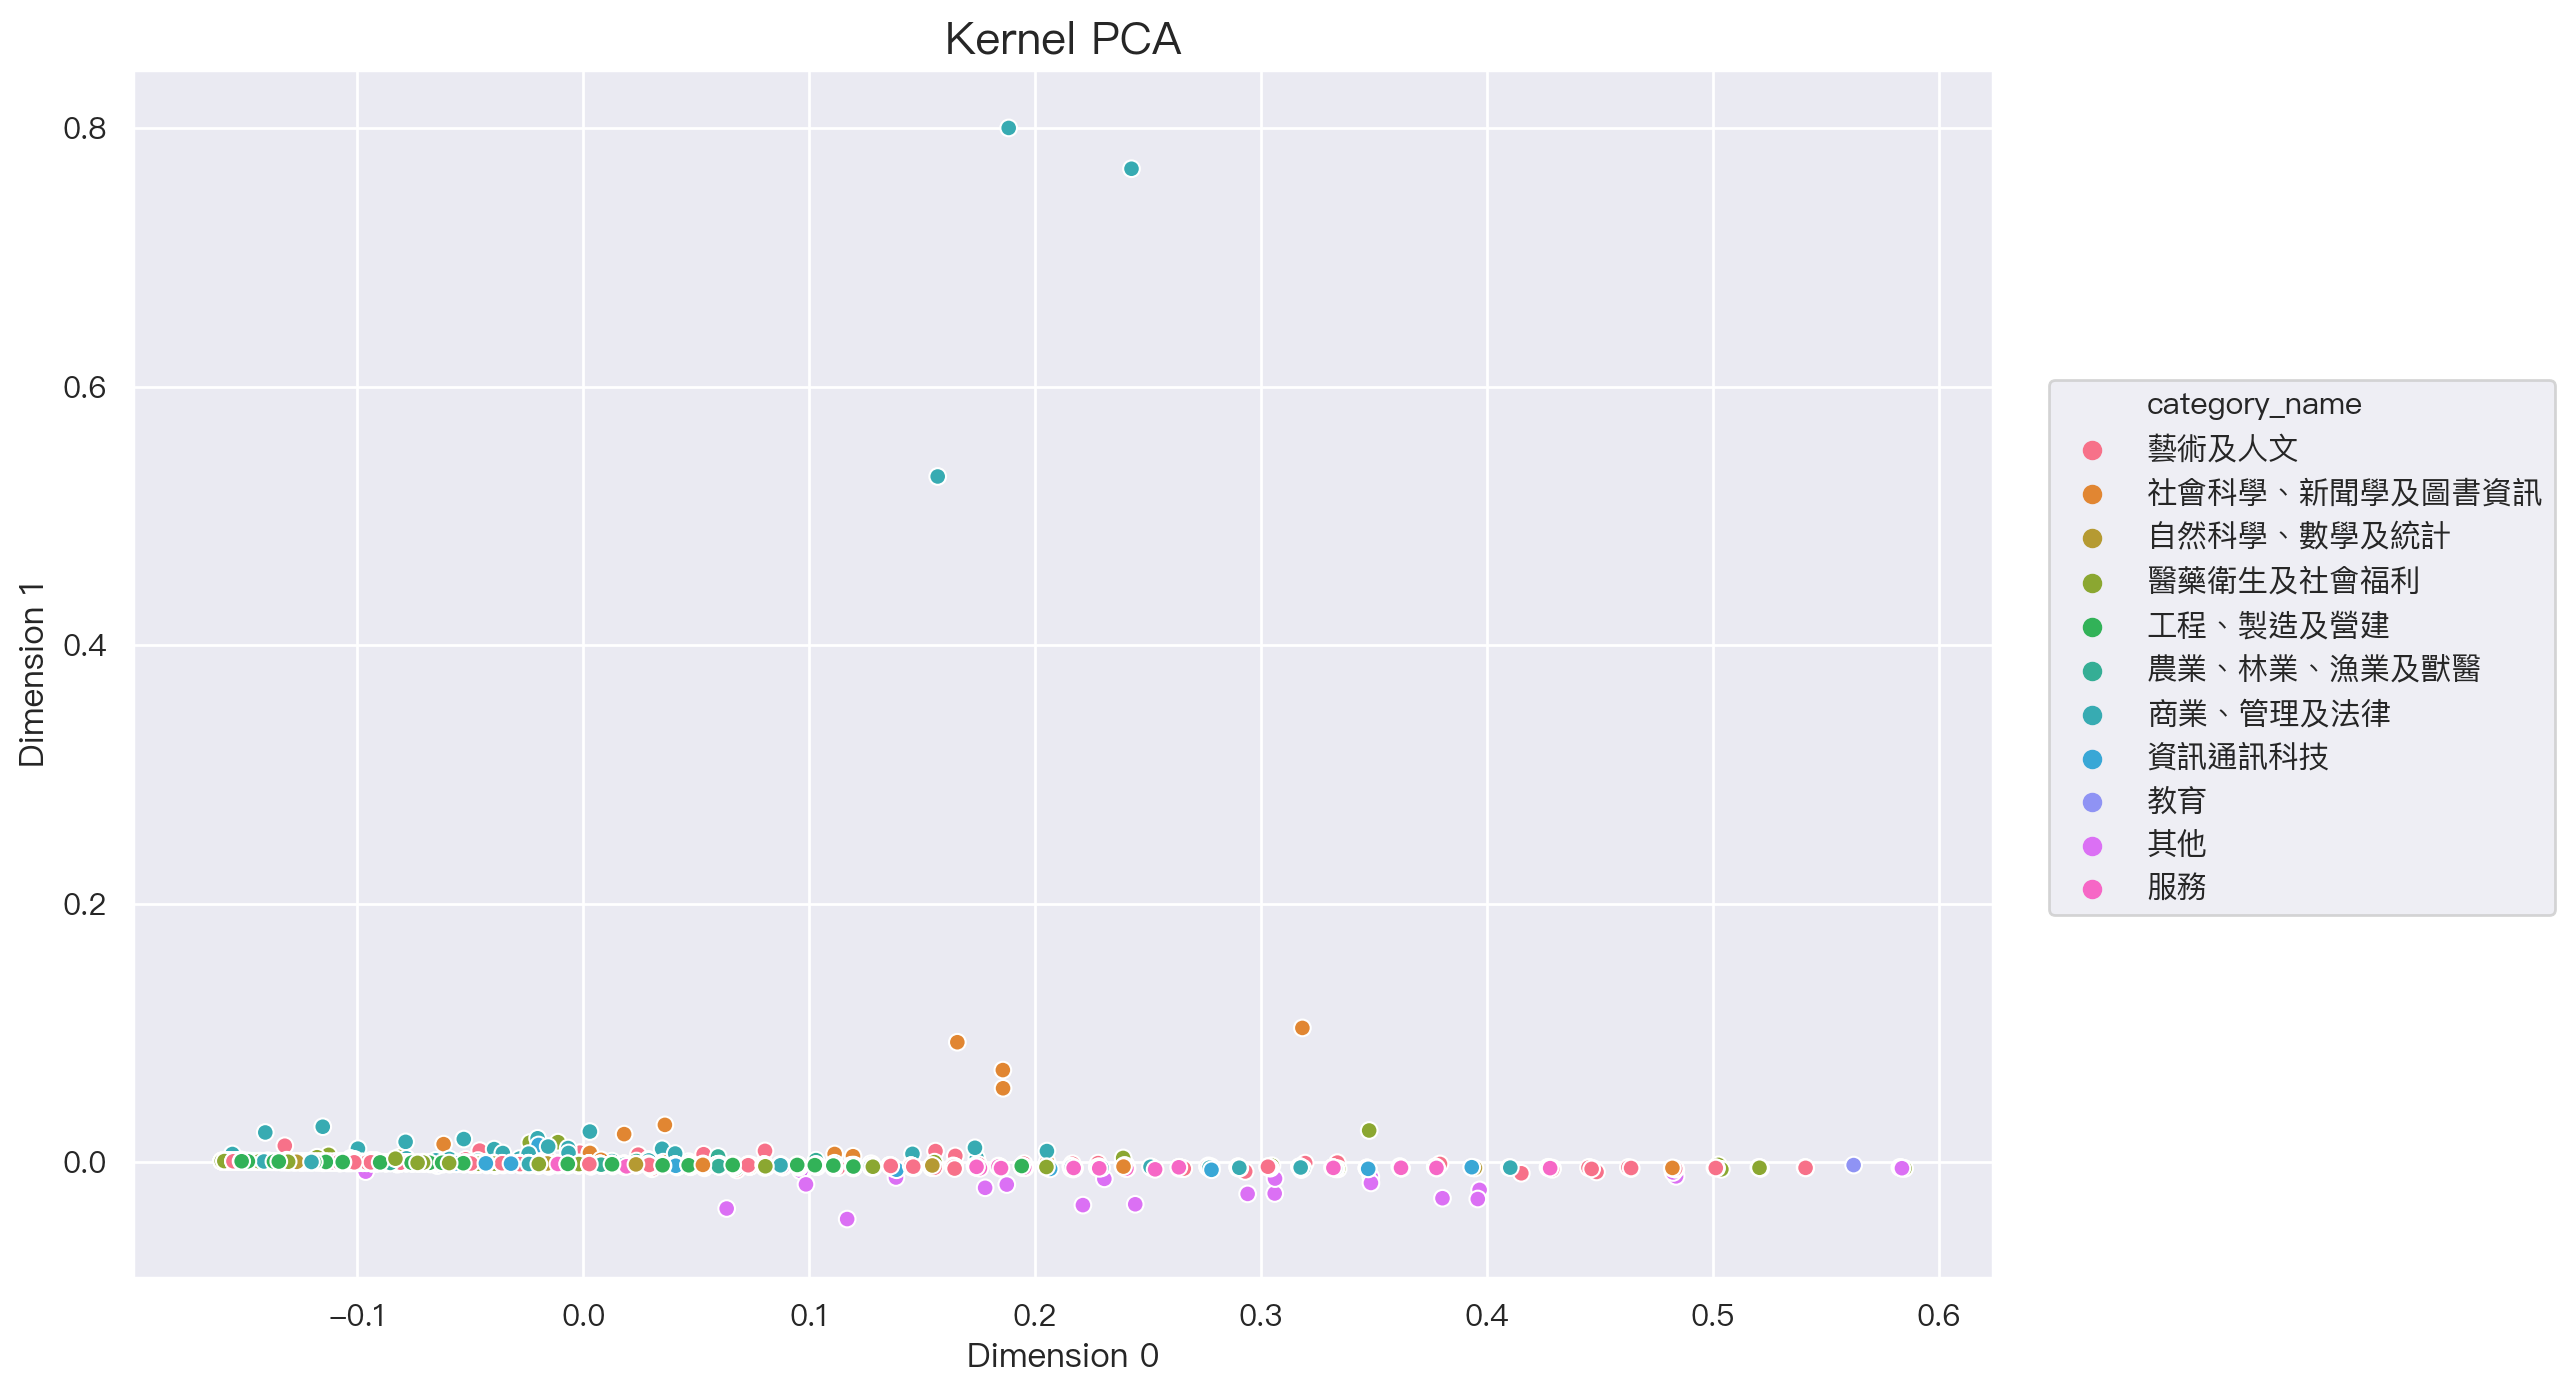

In [38]:
plt.figure(figsize = (12,8), dpi = 200)
sns.scatterplot(x =matrix_kpca.iloc[:, 0], y = matrix_kpca.iloc[:, 1], hue = matrix_kpca["category_name"])
plt.xlabel("Dimension 0")
plt.ylabel("Dimension 1")
plt.title("Kernel PCA", fontsize = 16)
plt.legend(loc = (1.03,0.3))
plt.show()

* Q2.5: Visualize academic departments using t-SNE. You should consider at least the Euclidian, Cosine, and Jaccard metric. Set numpy random seed so that your results can be repeated. Discuss the result.

In [64]:
# Euclidian
tsne_euclidean = TSNE(metric = "euclidean")
matrix_tsne_euclidean = tsne_euclidean.fit_transform(matrix.iloc[:, :-4])
matrix_tsne_euclidean = pd.concat([pd.DataFrame(matrix_tsne_euclidean), pd.DataFrame(matrix["category_name"]).reset_index(drop = True)], axis = 1)

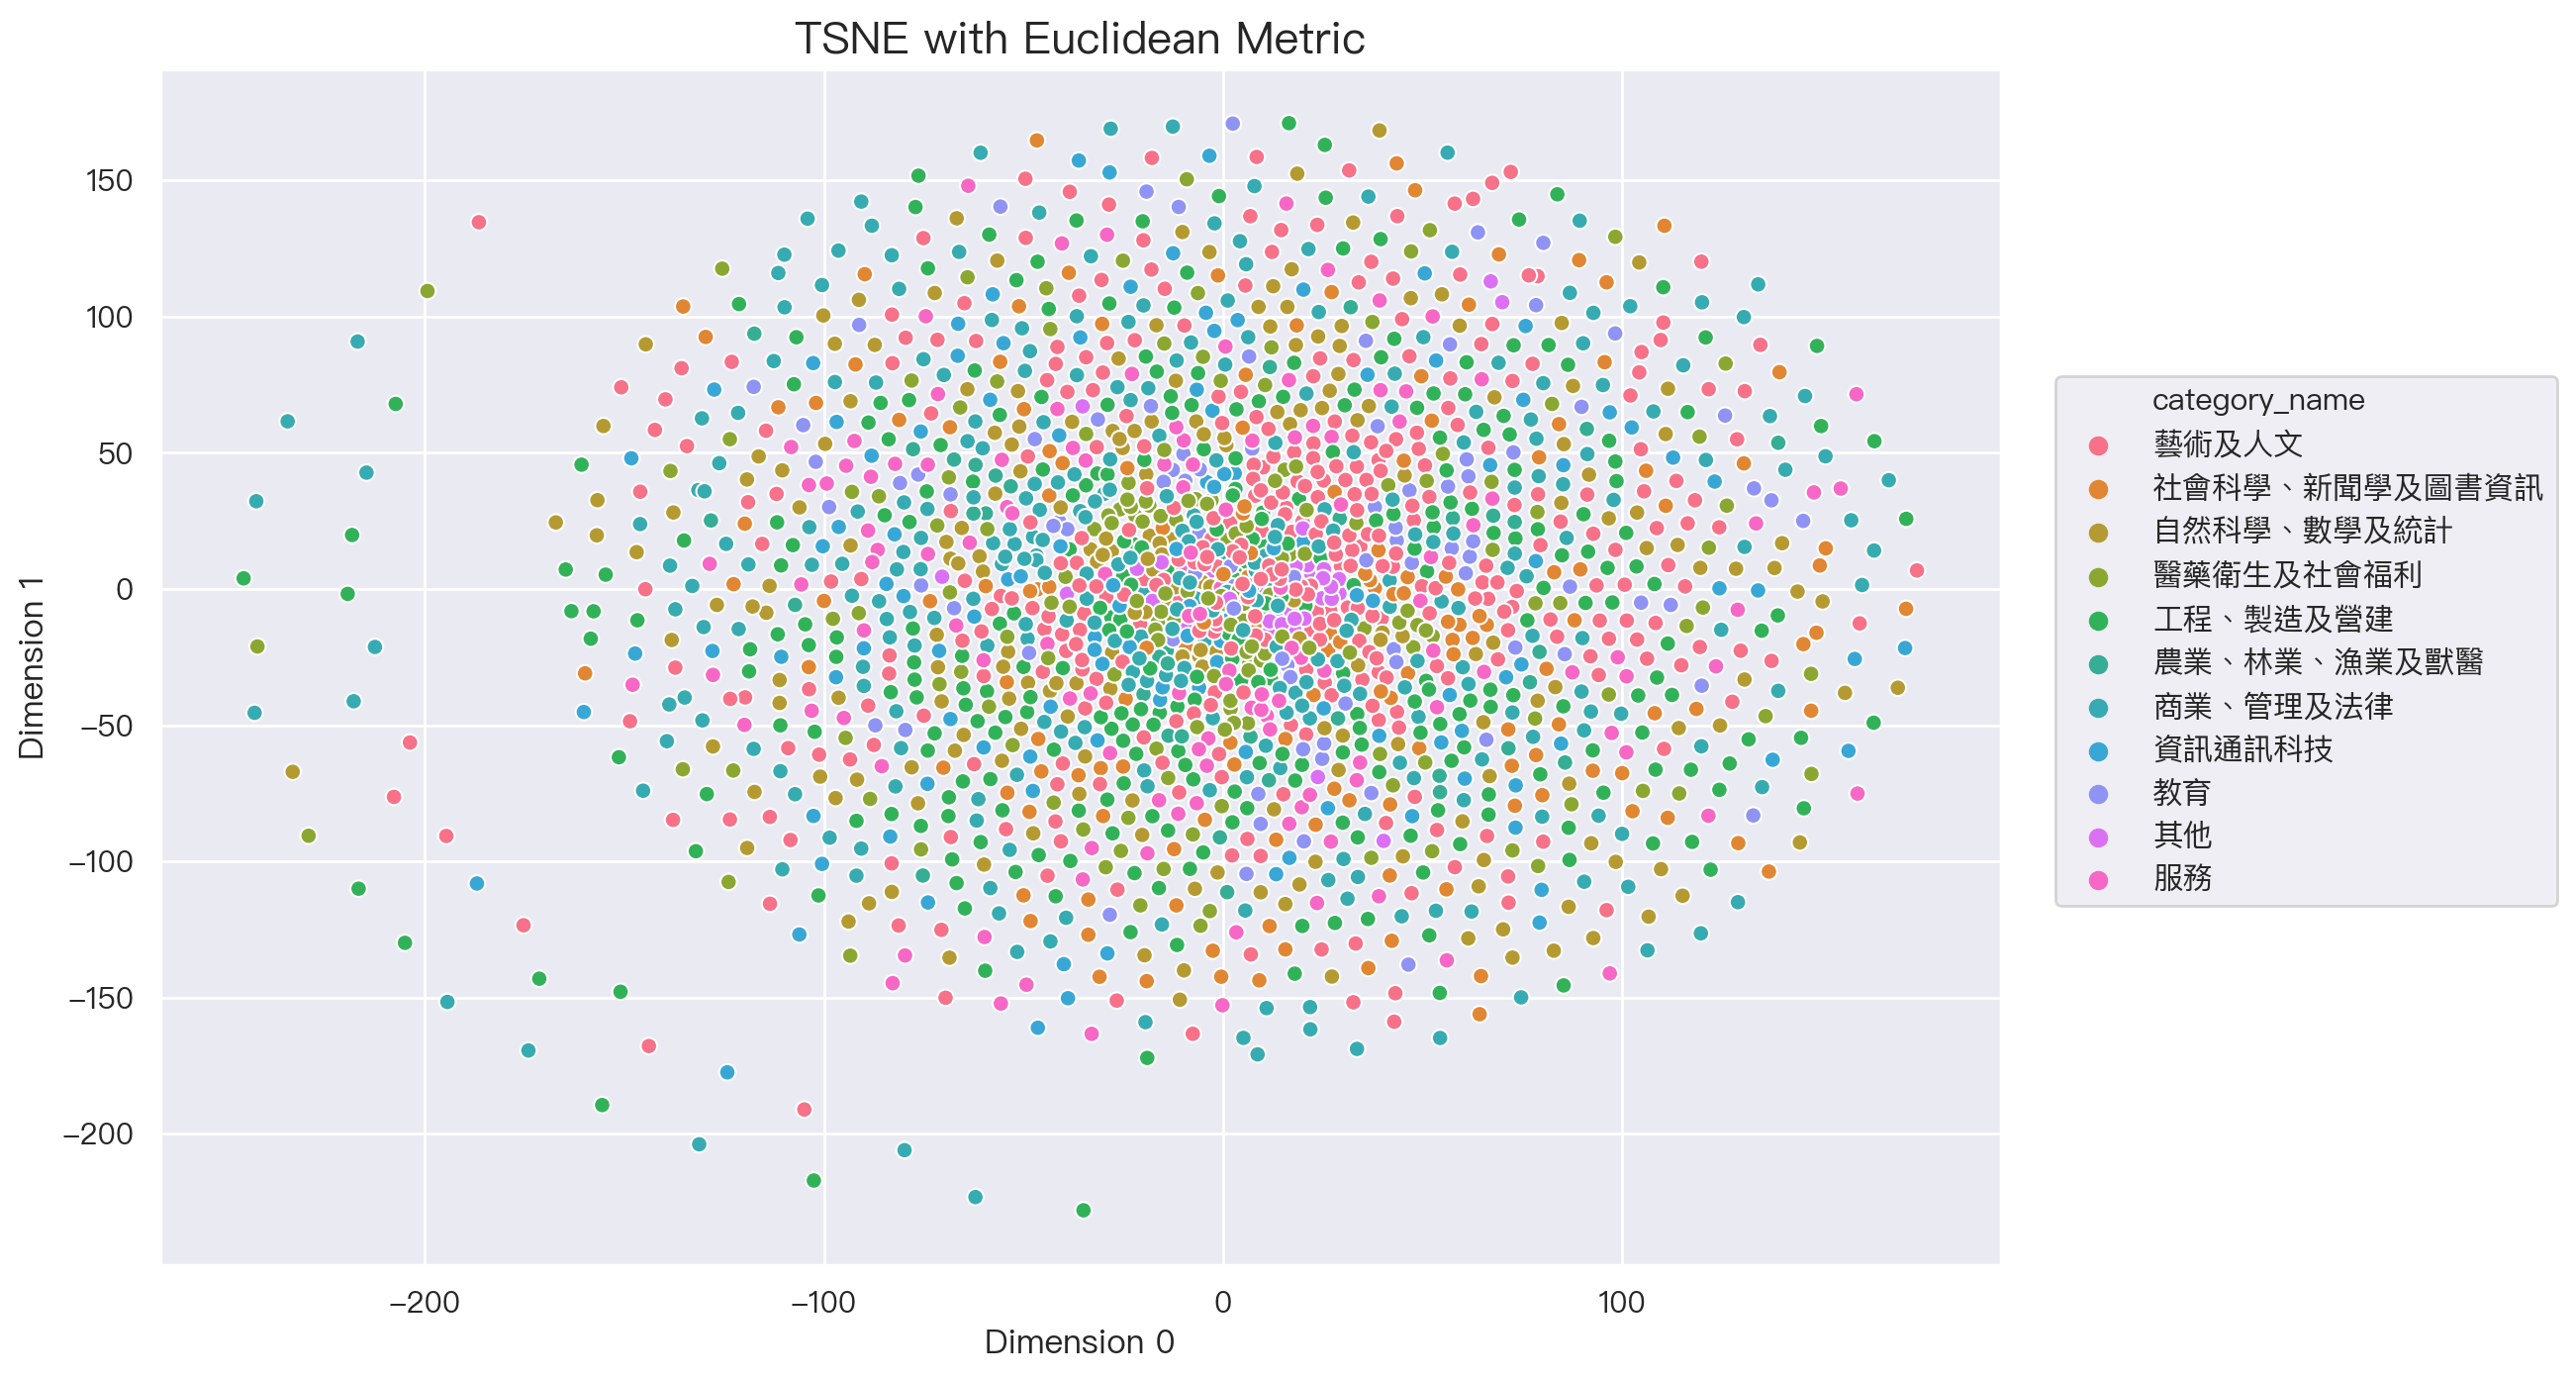

In [65]:
plt.figure(figsize = (12,8), dpi = 200)
sns.scatterplot(x = matrix_tsne_euclidean.iloc[:, 0], y = matrix_tsne_euclidean.iloc[:, 1], hue = matrix_tsne_euclidean["category_name"])
plt.xlabel("Dimension 0")
plt.ylabel("Dimension 1")
plt.title("TSNE with Euclidean Metric", fontsize = 16)
plt.legend(loc = (1.03,0.3))
plt.show()

In [61]:
# Cosine
tsne_cosine = TSNE(metric = "cosine")
matrix_tsne_cosine = tsne_cosine.fit_transform(matrix.iloc[:, :-4])
matrix_tsne_cosine = pd.concat([pd.DataFrame(matrix_tsne_cosine), pd.DataFrame(matrix["category_name"]).reset_index(drop = True)], axis = 1)

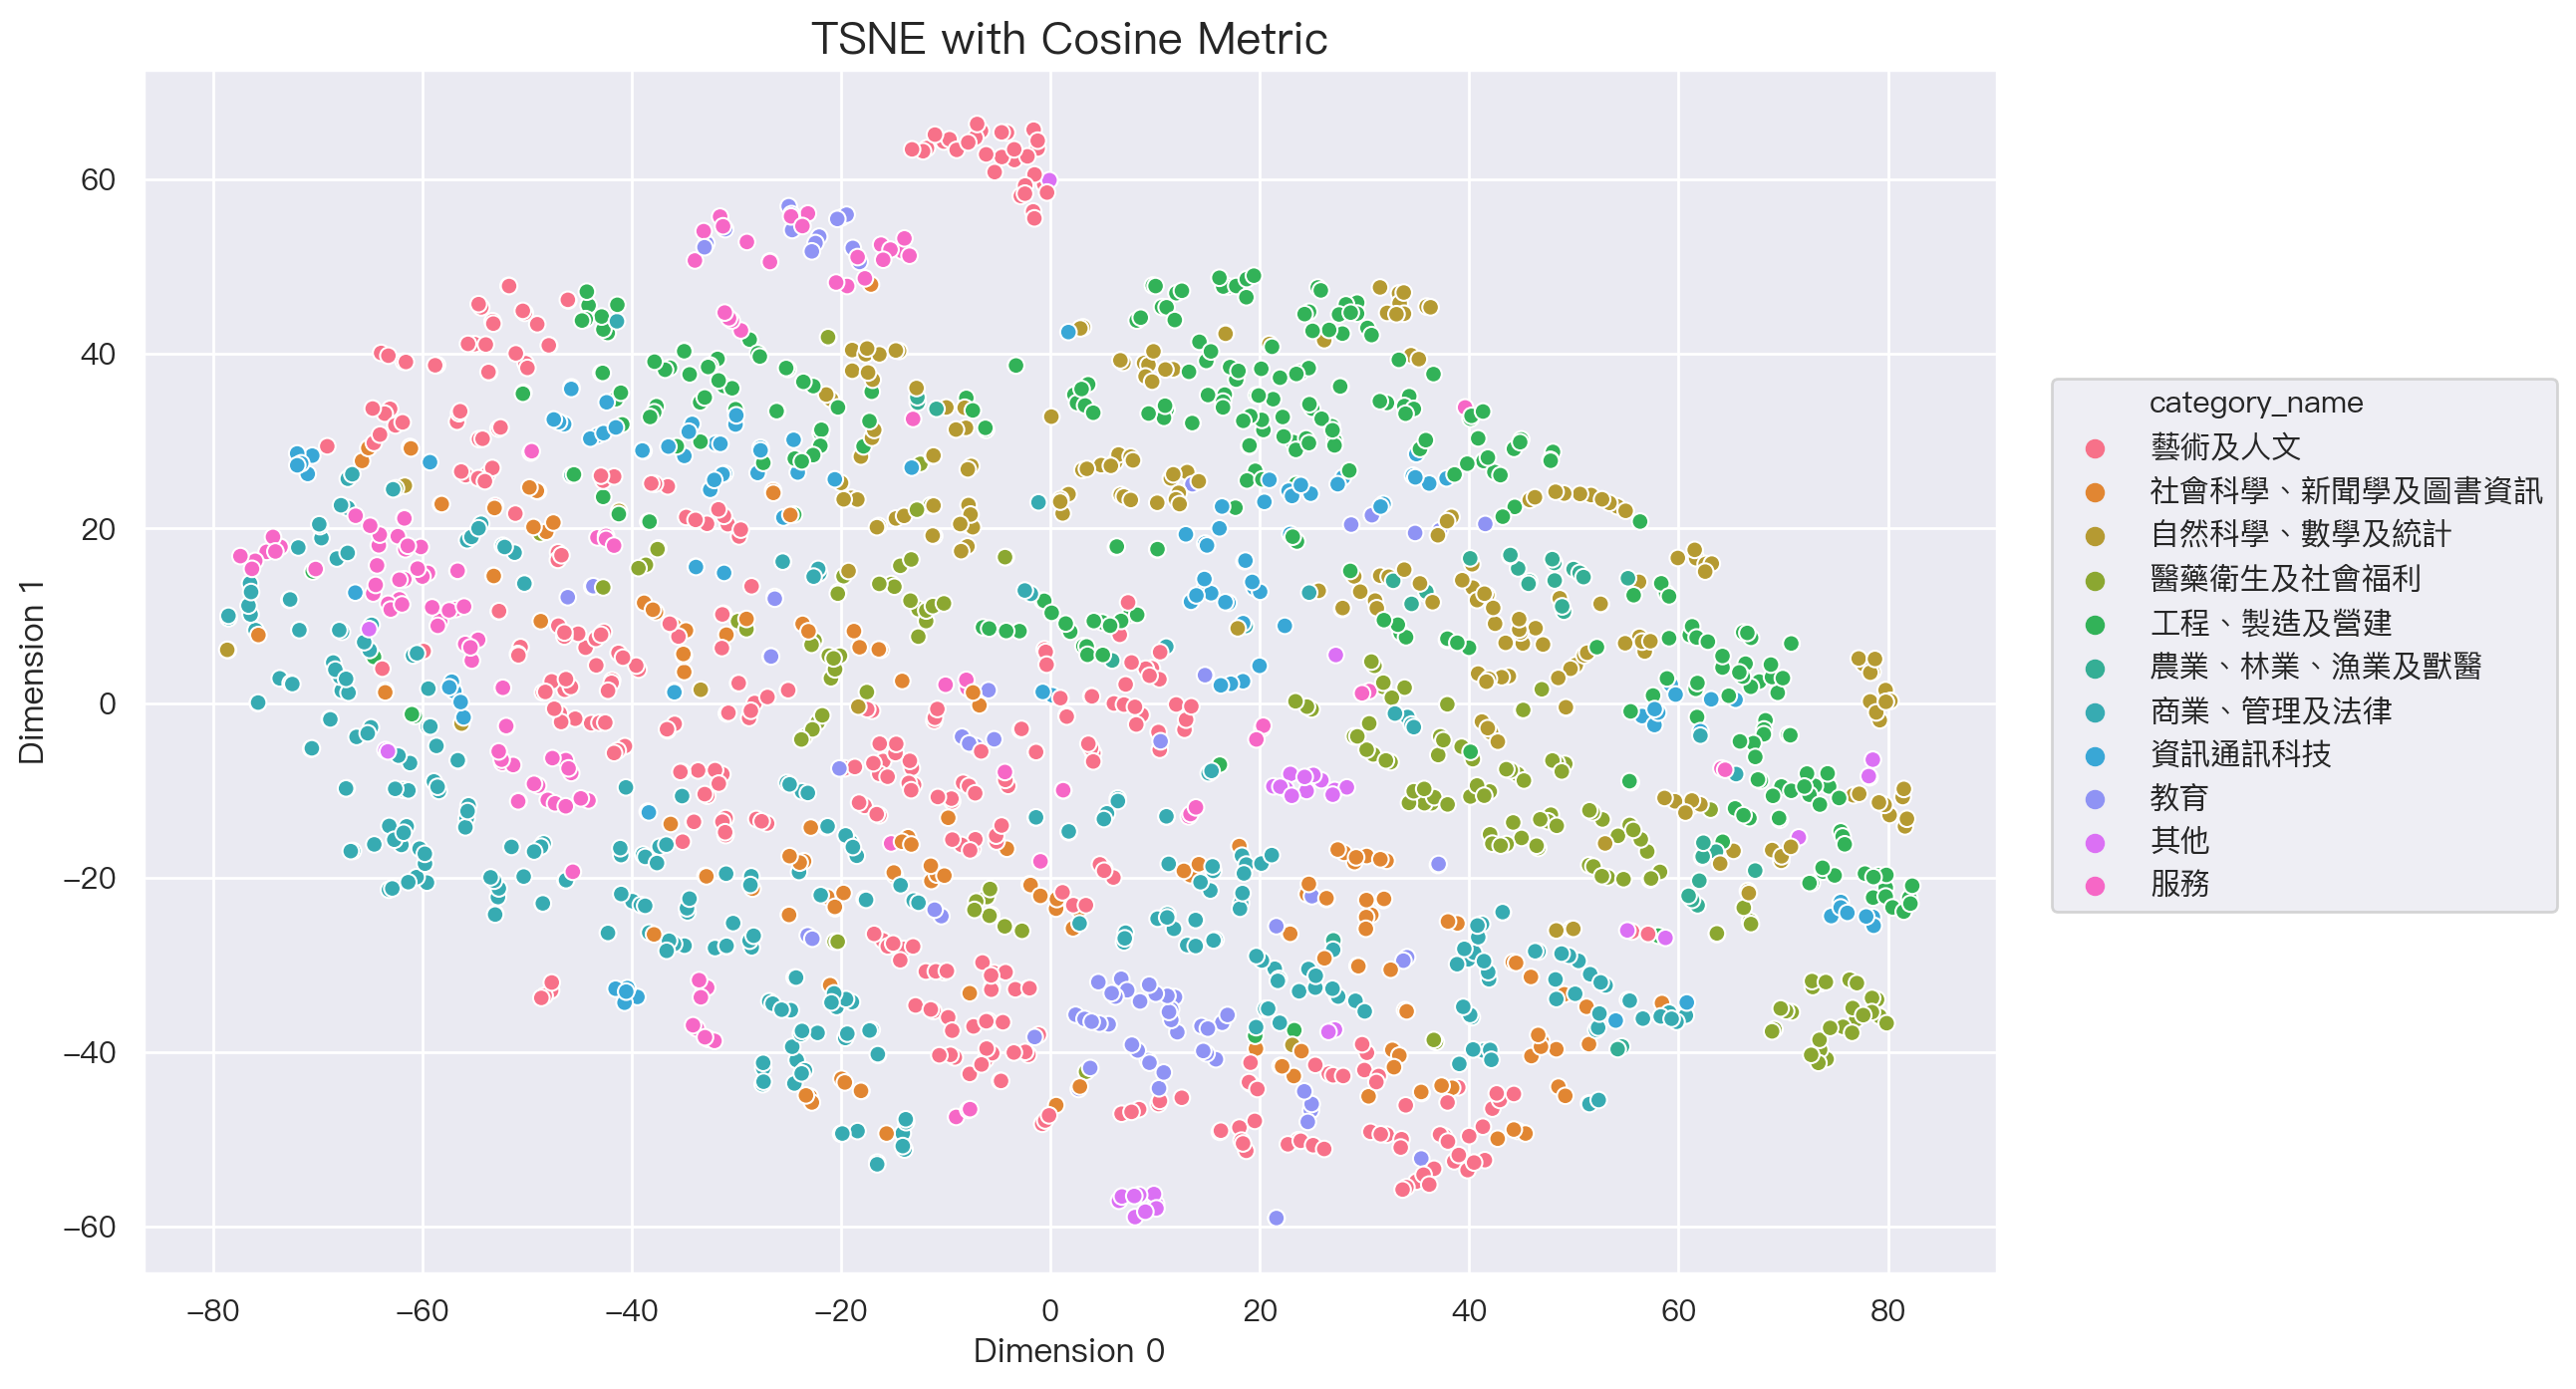

In [62]:
plt.figure(figsize = (12,8), dpi = 200)
sns.scatterplot(x =matrix_tsne_cosine.iloc[:, 0], y = matrix_tsne_cosine.iloc[:, 1], hue = matrix_tsne_cosine["category_name"])
plt.xlabel("Dimension 0")
plt.ylabel("Dimension 1")
plt.title("TSNE with Cosine Metric", fontsize = 16)
plt.legend(loc = (1.03,0.3))
plt.show()

In [66]:
# Jaccard
tsne_jaccard = TSNE(metric = "jaccard")
matrix_tsne_jaccard = tsne_jaccard.fit_transform(matrix.iloc[:, :-4])
matrix_tsne_jaccard = pd.concat([pd.DataFrame(matrix_tsne_jaccard), pd.DataFrame(matrix["category_name"]).reset_index(drop = True)], axis = 1)

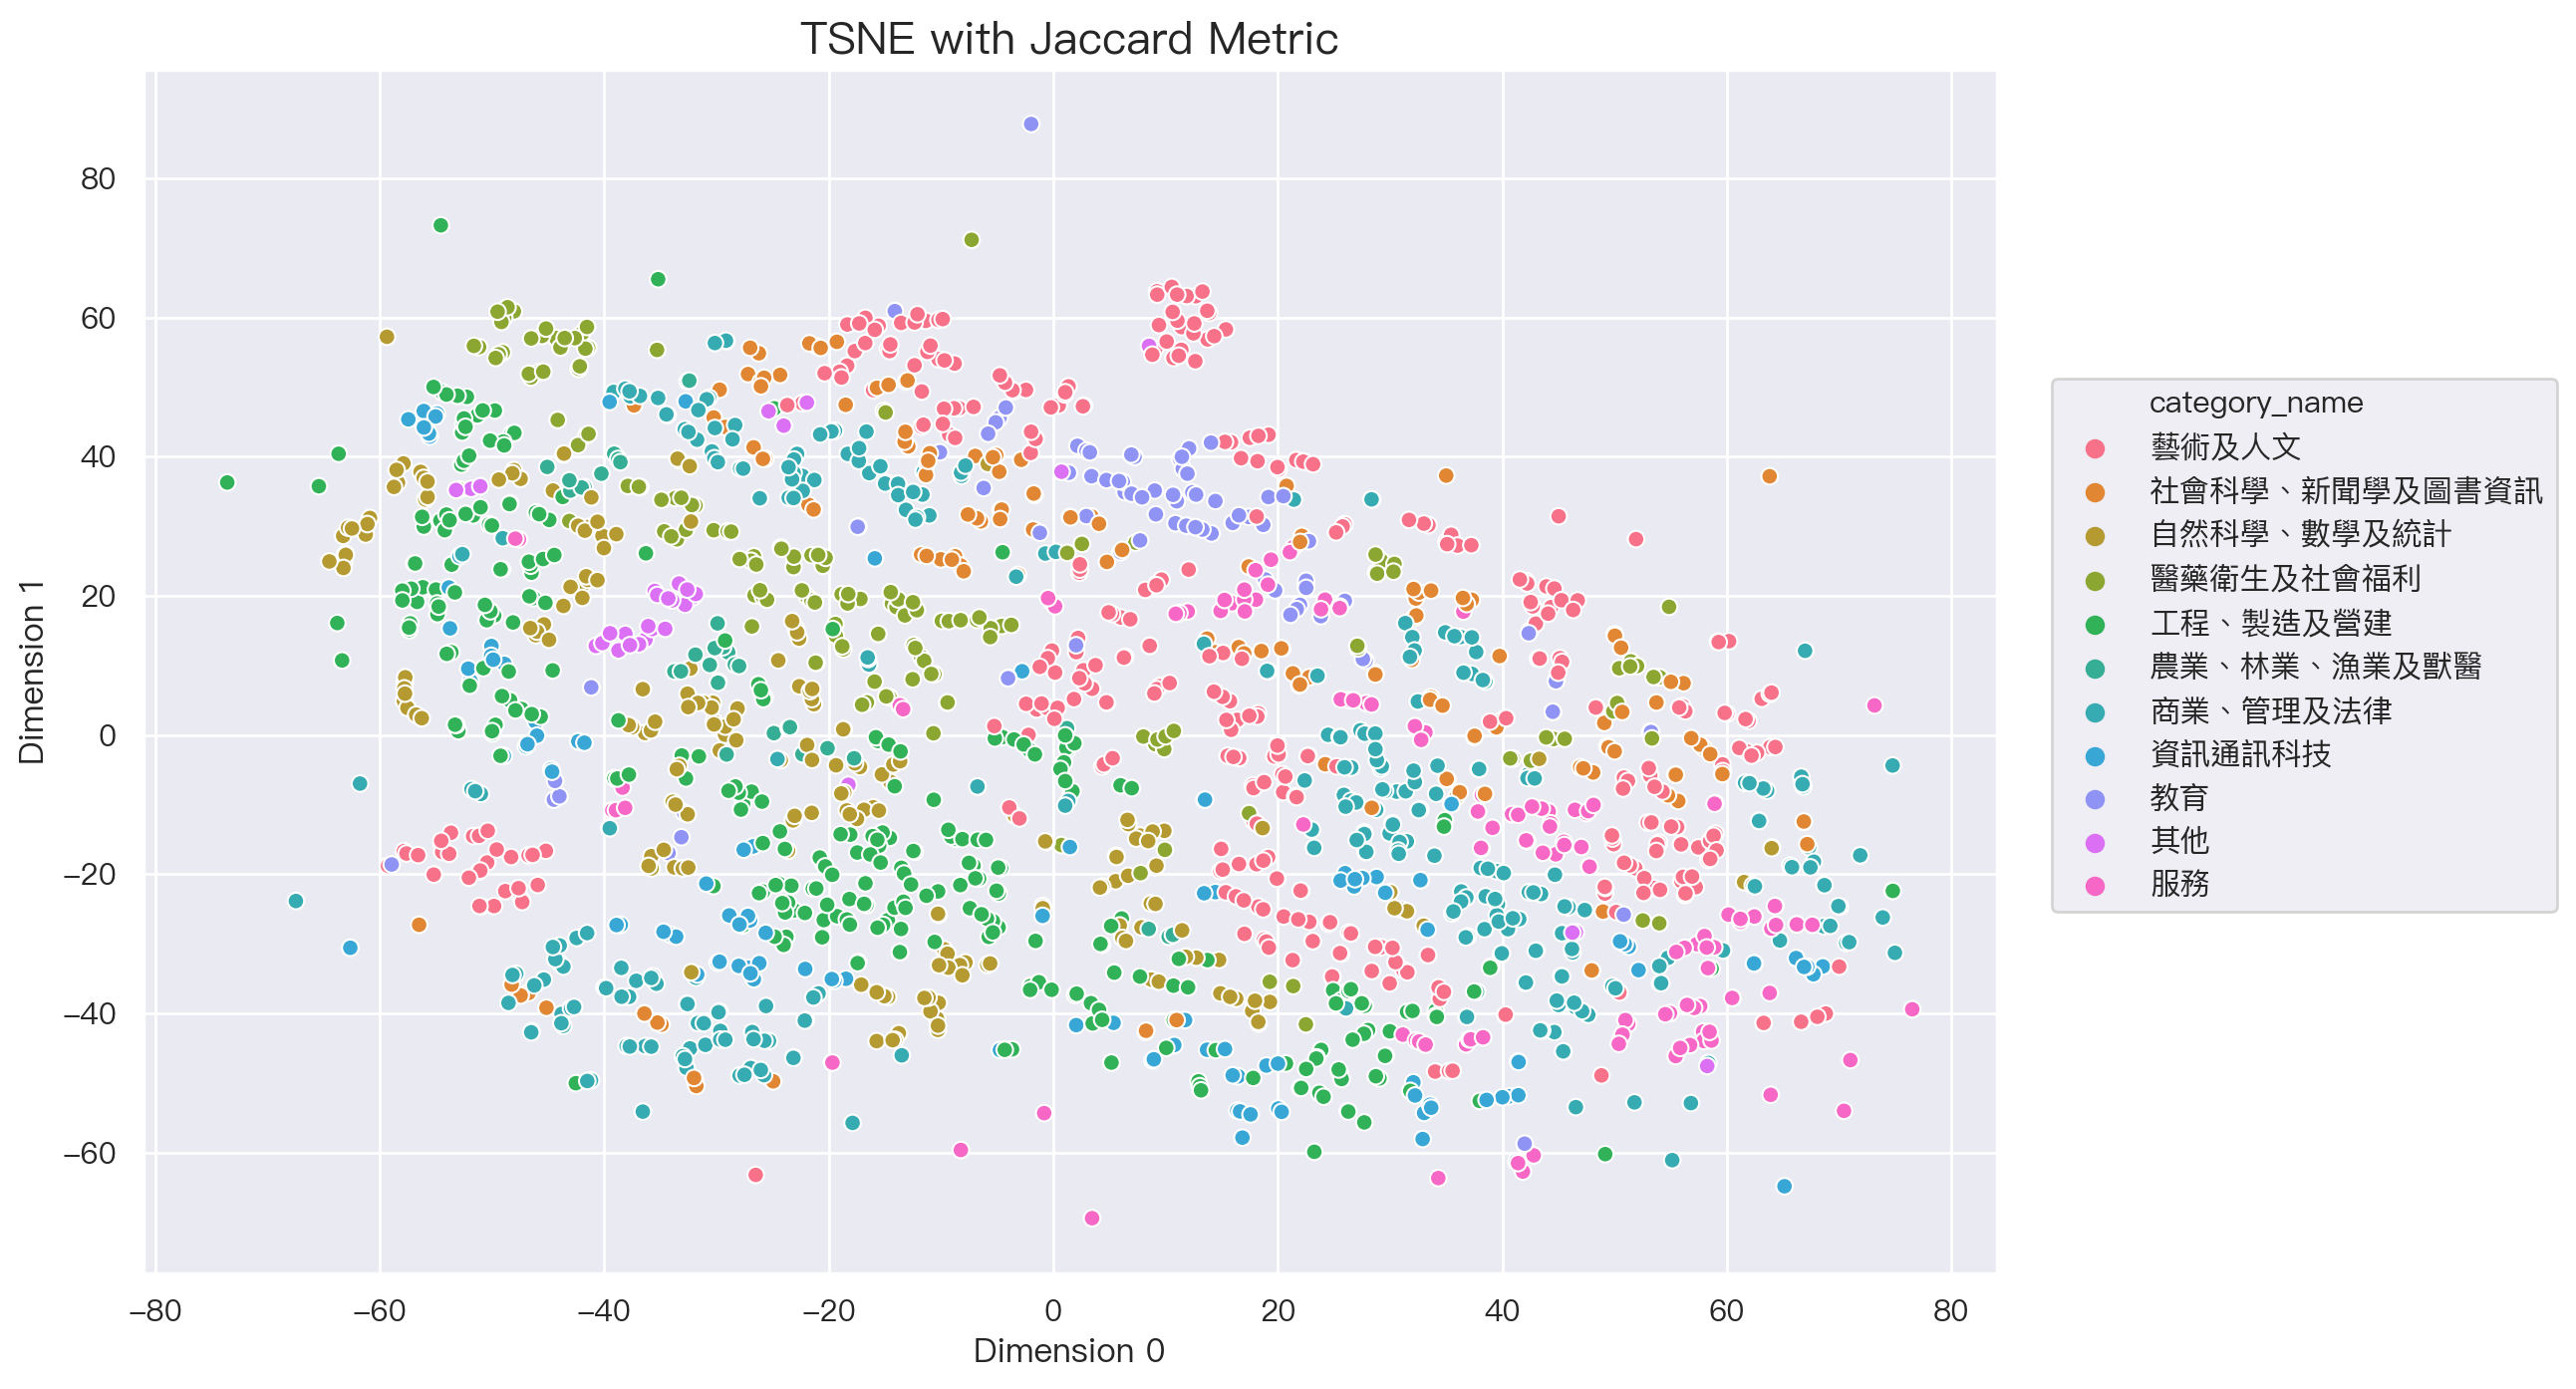

In [69]:
plt.figure(figsize = (12,8), dpi = 200)
sns.scatterplot(x = matrix_tsne_jaccard.iloc[:, 0], y = matrix_tsne_jaccard.iloc[:, 1], hue = matrix_tsne_jaccard["category_name"])
plt.xlabel("Dimension 0")
plt.ylabel("Dimension 1")
plt.title("TSNE with Jaccard Metric", fontsize = 16)
plt.legend(loc = (1.03,0.3))
plt.show()

# Question 3 [Refine]

<b>(30%) <u>Select the most promising visualization method in the previous question and refine the result.You should color points by department category. Label each data point with its name so that we can quickly identify a data point on the picture.  Moreover, you should try to reduce the problem caused by overlapping points and labels.</u> Output an image that is large enough so that a user can easily identify a department and its neighbors. Jupyter Lab has limitations on the largest picture size. To overcome this problem, output the picture to a separate file and submit the file for grading. Your score depends on how useful, readable, and visually pleasing of your visualization results.</b>

* 我選擇TSNE with Jaccard metric作為降維的演算法

In [99]:
Final_Matrix = pd.concat([matrix_tsne_jaccard, 
           pd.DataFrame(matrix["school_name"]).reset_index(drop = True),
           pd.DataFrame(matrix["department_name"]).reset_index(drop = True)], axis = 1)

In [2]:
plt.figure(figsize = (150, 100), dpi = 200)
sns.scatterplot(x = Final_Matrix.iloc[:, 0], y = Final_Matrix.iloc[:, 1], 
                             hue = (Final_Matrix["category_name"]))

for i in range(len(Final_Matrix)):
    x = Final_Matrix.iloc[i,0]
    y = Final_Matrix.iloc[i,1]
    plt.text(x * (1 + 0.01), y * (1 + 0.01), Final_Matrix.iloc[i,3] +" "+ Final_Matrix.iloc[i,4], fontsize = 12)

plt.savefig("HW4.png")
plt.close()